## Imports

In [35]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from typing import List, Tuple, Union, Dict
import numpy as np
import random
import pickle
import itertools
%matplotlib inline

## Problem 1: Linear Algebra Review

### Part 1: Traces


Compute Trace(A).

Let
 ${\bf{A}} =  {\begin{bmatrix}
   1 & 2  \\
   5 & -2  \\
\end{bmatrix}} $
and
$
 {\bf{B}} =  {\begin{bmatrix}
   1 & 0 & 0  \\
   2 & 0 & 2  \\
\end{bmatrix}}  \\ 
$. 

In [2]:
A = [[1,2],[5,-2]] #Defines matrix A
B = [[1,0,0],[2,0,2]] #Defines matrix B 


print('The trace for A is: %i \nThe trace for B is: %i.' %((np.trace(A)), (np.trace(B)))) #Print statement for both 

The trace for A is: -1 
The trace for B is: 1.


### Part 2
Compute Trace(BB<sup>T</sup>)

In [3]:
print('The trace for BB^T is: %i' %(np.trace((B@np.transpose(B))))) #Finds the trace of BB^T

The trace for BB^T is: 9


## Problem 2: Linear Algebra Review

Let A ∈R<sup>n×n</sup>, D ∈R<sup>n×n</sup>, b ∈Rn, and x<sup>T</sup> (A + D) = b<sup>T</sup> . Use the matrix inverse to solve
for x and simplify. Assume that det (A + D) ̸= 0.

## Problem 3: Linear Alegebra Review 

Let matrix A ∈R<sup>n×n</sup> and matrix B ∈R<sup>n×m</sup>, where n ̸= m.

In [4]:
def mat_props(n: int, m: int) -> None:
    """
    Multiplies two matrices A and B of dimensions n x n and n x m, respectively, and prints the results
    of both multiplications as a string.

    Args:
    - n: an integer indicating the dimension of the square matrix A and the number of rows in matrix B.
    - m: an integer indicating the number of columns in matrix B.

    Returns:
    - None
    """
    # Create matrix A with shape n x n
    A = np.random.rand(n, n)
    
    # Create matrix B with shape n x m
    B = np.random.rand(n, m)
    
    # Multiply A x B
    try:
        AB = np.dot(A, B)
        AB= 'Possible'
    except ValueError:
        AB = 'Not Possible'
    
    # Multiply B x A
    try:
        BA = np.dot(B, A)
    except ValueError:
        BA = 'Not Possible'
    
    # Print the results as a string
    print('The product of A x B is %s and the size of the matrix will be nxm\nThe product of B x A is %s' %(AB, BA))


In [5]:
#Calls the matrix properties function 
mat_props(2,4)

The product of A x B is Possible and the size of the matrix will be nxm
The product of B x A is Not Possible


### Part 1: 
If it is possible to compute the matrix product AB, give the size of the matrix produced.
Otherwise, write, ‘Not possible.’ <br>

<b> It is posisble</b>

### Part 2:

If it is possible to compute the matrix product BA, give the size of the matrix produced.
Otherwise, write, ‘Not possible.’ <br>

<b> It is not possible</b>

## Problem 4 Regression


Tastes in music have gradually changed over the years. Based on this observation, our goal is to predict the year of a song based on its timbre summary features. This dataset is from the 2011 Million Song Challenge dataset: https://labrosa.ee.columbia.edu/ millionsong/ <br>

To establish a baseline, we wish to build a linear model that predicts the year. Given an input x ∈ R90, we want to find parameters for a model yˆ = round (f (x)) that predicts the year, where y ∈ Z. <br>


We are going to explore three shallow (linear) neural network models with different acti- vation functions for this task. <br>


To evaluate the model, you must round the output of your linear neural network. You then compute the mean squared error.<br>



### Part 1: Loading and Exploring the Data


Download the music year classification dataset music-dataset.txt at https://archive.
ics.uci.edu/ml/datasets/yearpredictionmsd. Each row is an instance. The first value
is the target to be predicted (a year), and the remaining 90 values in a row are all input
features. Split the dataset into train and test partitions by treating the first 463,714 exam-
ples as the train set and the remaining examples as the test set. The first 12 dimensions
are the average timbre and the remaining 78 are the timbre covariance in the song.<br>
<br>Write a function to load the dataset, e.g.,
trainYears, trainFeat, testYears, testFeat = loadMusicData(fname, addBias) where
trainYears has the years for the training data, trainFeat has the features, etc. addBias
appends a ‘1’ to your feature vectors. Each of the returned variables should be NumPy
arrays.<br>
<br>Write a function mse = musicMSE(pred, gt) where the inputs are the predicted year and
the “ground truth” year from the dataset. The function computes the mean squared error
(MSE) by rounding pred before computing the MSE.<br>
<br>Load the dataset and discuss its properties. What is the range of the variables? How might
you normalize them? What years are represented in the dataset?<br>
<br>What will the test mean squared error (MSE) be if your classifier always outputs the most
common year in the dataset?<br>


In [6]:
def load_Music_Data(filename: str, add_bias: bool = True) -> tuple:
    """Loads music data from a file and returns training and testing data.

    Args:
        filename (str): The name of the file containing the music data.
        add_bias (bool, optional): Whether or not to add a bias term to the feature vectors. Defaults to True.

    Returns:
        tuple: A tuple containing the training years, training features, testing years, and testing features.
    """
    with open(filename, "r") as file:
        data = file.readlines()

    # Parse the data
    data_new = [row.strip().split(",") for row in data]
    
    # Split into training and testing data
    training_data = np.array(data_new[:463714])
    testing_data = np.array(data_new[463714:])
    
    # Split features and labels
    train_years, test_years = training_data[:,0].astype(int).reshape(-1,1),testing_data[:,0].astype(int).reshape(-1,1)
    train_features,test_features = training_data[:,1:].astype(float),testing_data[:,1:].astype(float)
  

    # Add the bias term to the features if requested
    if add_bias:
        train_features = np.append(np.ones([len(train_features),1]), train_features, 1)
        test_features = np.append(np.ones([len(test_features),1]), test_features, 1)

    return train_years, train_features, test_years, test_features

In [7]:
def musicMSE(predictions: np.ndarray, ground_truths: np.ndarray) -> float:
    """
    This function calculates the Mean Squared Error (MSE) between the predicted and ground truth music data.
    It takes two input numpy arrays, `predictions` and `ground_truths`, and returns the calculated MSE value.

    Args:
    - predictions: A numpy array of predicted music data
    - ground_truths: A numpy array of ground truth music data

    Returns:
    - A float value representing the calculated MSE
    """

    # Round the predicted music data to the nearest integer value
    rounded_predictions = np.rint(predictions)

    # Calculate the MSE between the rounded predictions and ground truth music data
    mse = np.square(rounded_predictions - ground_truths).mean()

    return mse

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def dataset_assessment(train_years, train_feat, test_years, test_feat) -> None:
    """
    This function assesses the given dataset by printing statistics and generating a histogram of the label years.
    It also calculates the test set MSE for two simple baselines: always predicting the most frequent year, and always predicting 1998.
    
    Args:
    train_years: numpy array of shape (num_train_samples, 1) representing the label years of the training set
    train_feat: numpy array of shape (num_train_samples, num_features) representing the features of the training set
    test_years: numpy array of shape (num_test_samples, 1) representing the label years of the test set
    test_feat: numpy array of shape (num_test_samples, num_features) representing the features of the test set
    
    Returns:
    None
    """
    
    # Plot a histogram of the label years for the training and test sets
    plt.figure(dpi=400)
    plt.hist(train_years.flatten(), label="Training label")
    plt.hist(test_years.flatten(), label="Testing label")
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.show()

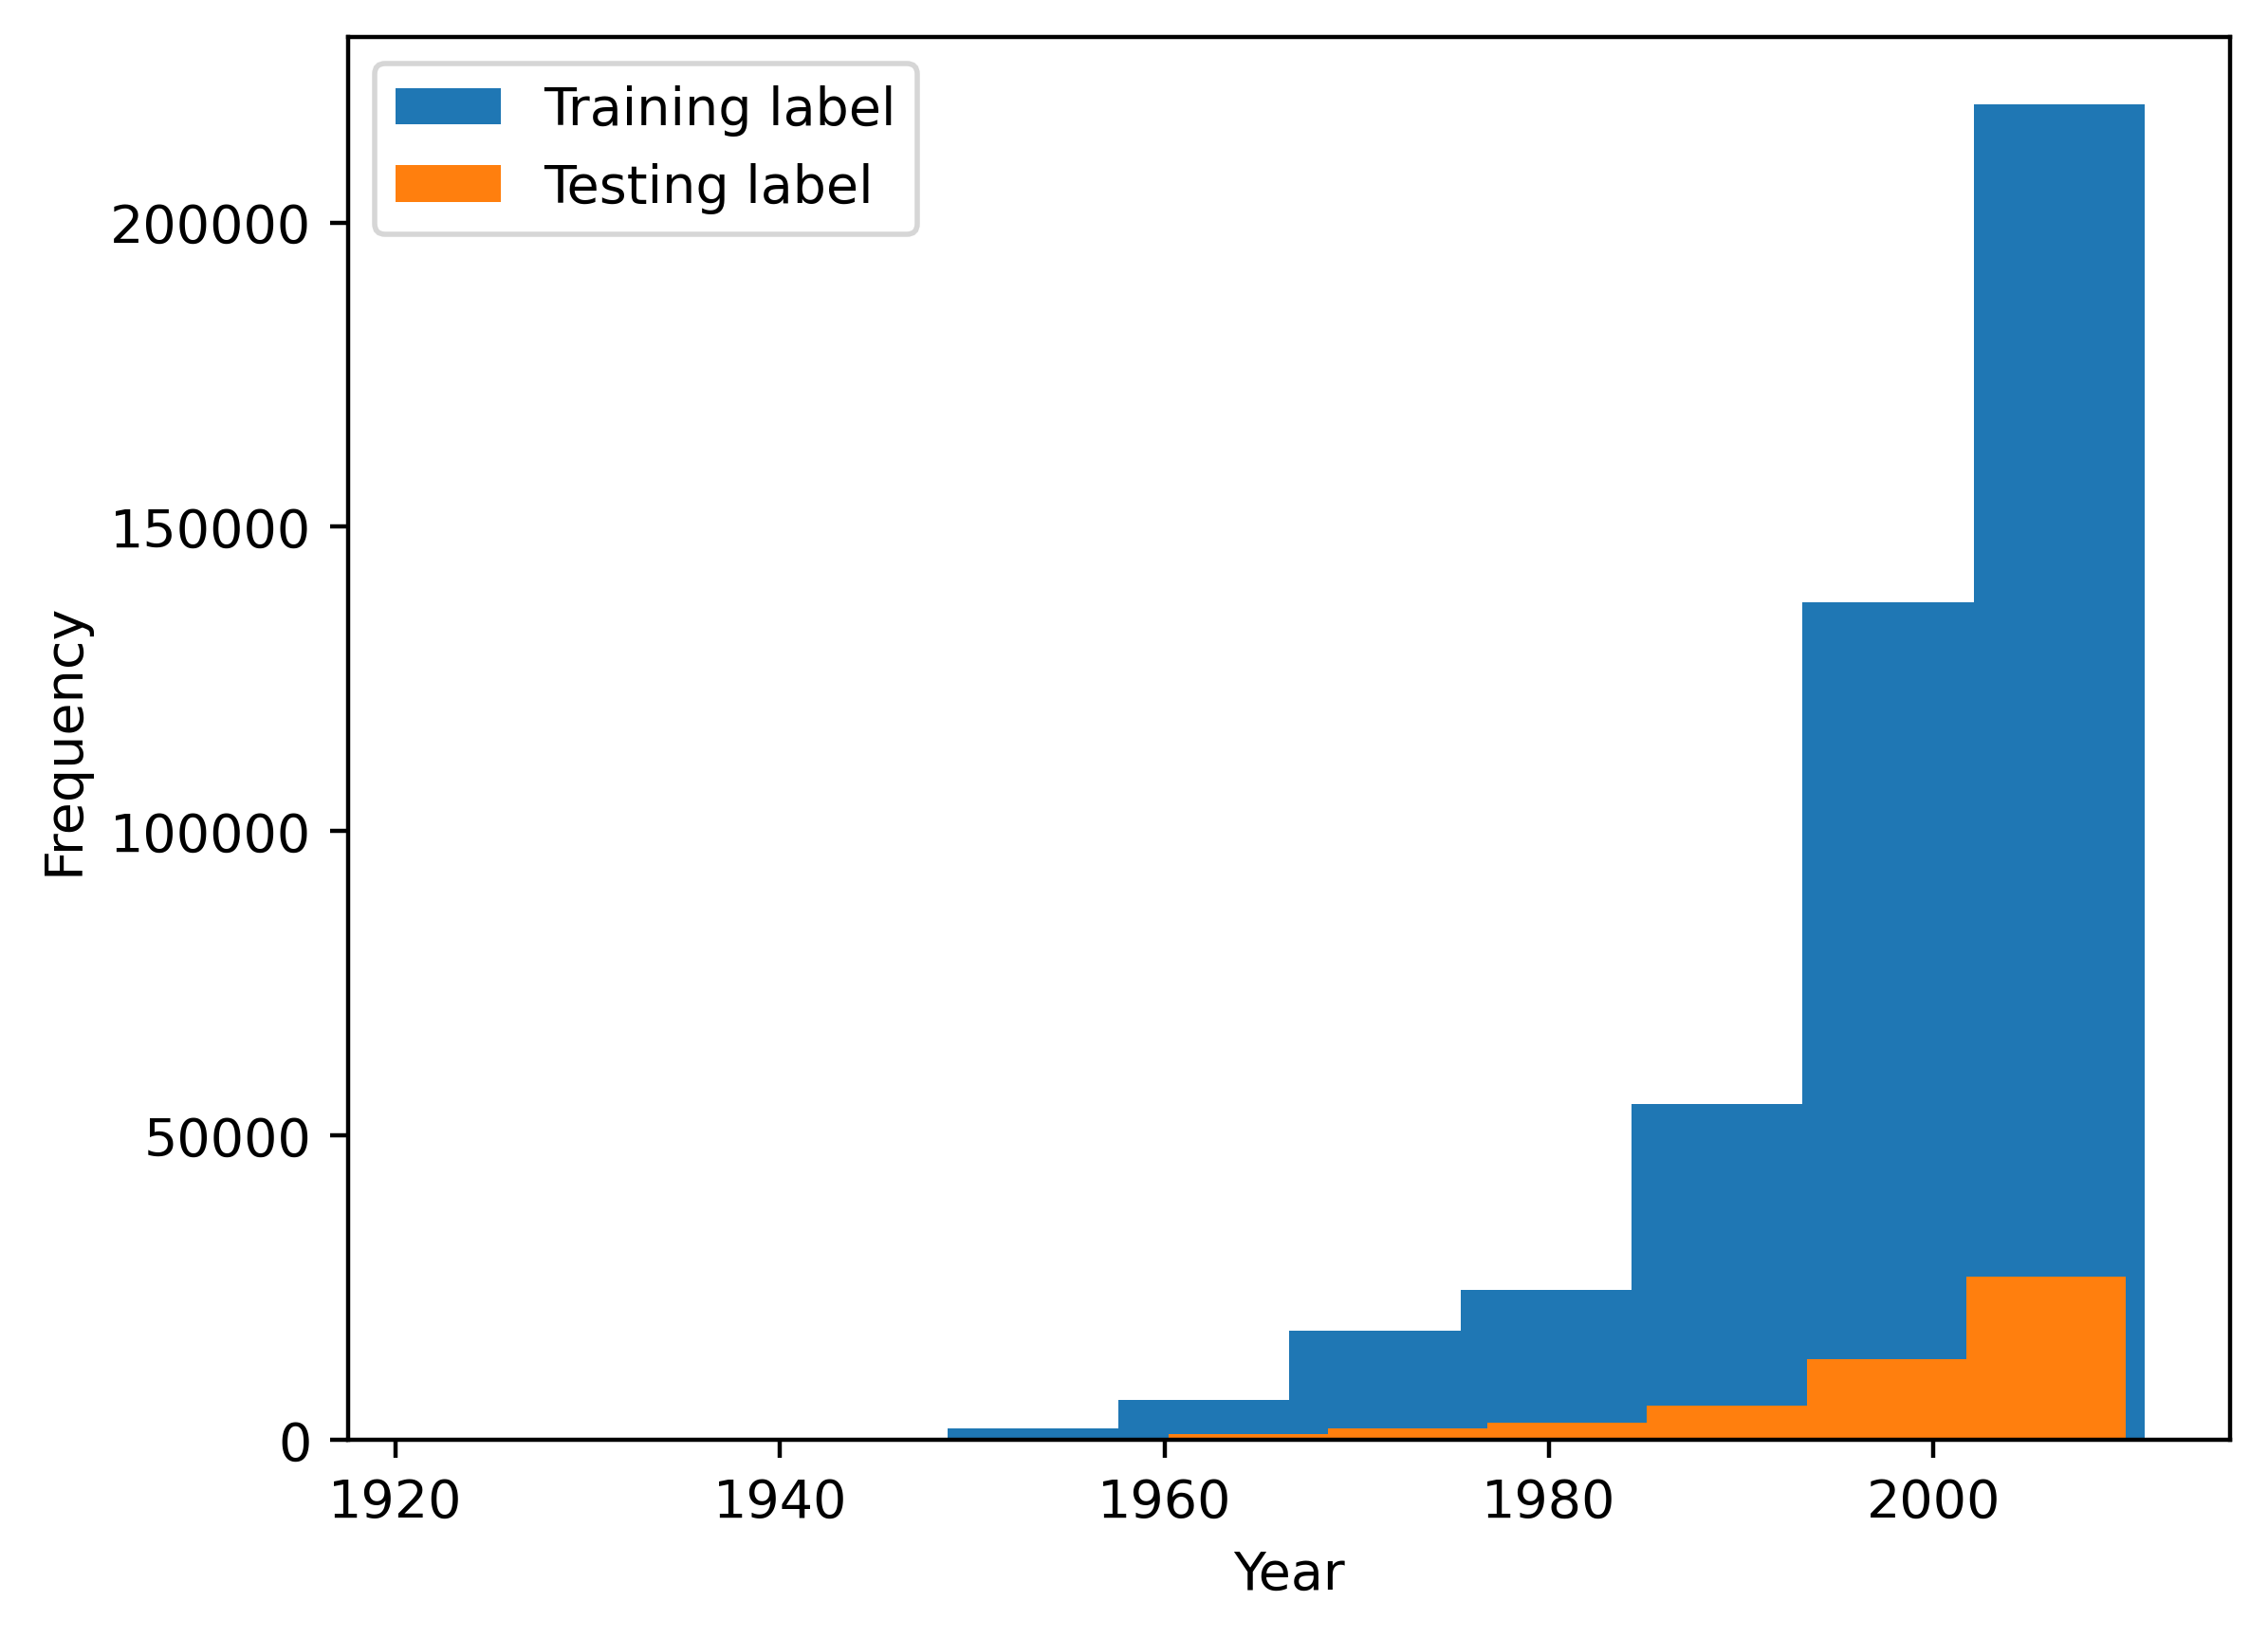

In [9]:
# Load the music data from a file and add a bias column to the feature matrices
trainYears, trainFeat, testYears, testFeat = load_Music_Data("/Users/wdaugherty/Cornell_Tech_DL/CS-5787/HW2/data/YearPredictionMSD.txt", add_bias=True)

# Assess the quality of the training and test datasets
dataset_assessment(trainYears, trainFeat, testYears, testFeat)


In [10]:
def normalize(feature: np.ndarray) -> np.ndarray:
    """
    Normalize each feature in the input array to have zero mean and unit variance.

    Args:
        feature (np.ndarray): Input feature array with shape (n_samples, n_features).

    Returns:
        np.ndarray: Normalized feature array with the same shape as the input.
    """

    # Loop over each feature column and normalize it
    for i in range(feature.shape[1]):
        
        # Subtract the mean and divide by the standard deviation
        feature[:, i] = (feature[:, i] - np.mean(feature[:, i])) / np.std(feature[:, i])
    
    # Return the normalized feature array
    return feature

In [11]:
def tune_ridge_parameters(train_x: np.ndarray, train_y: np.ndarray) -> Tuple[float, int, float]:
    """
    Select the best hyperparameters based on the smallest development set loss.
    
    Args:
    - learning_rate: learning rate of the model
    - batch_size: number of training samples in each batch
    - lambda_list: list of regularization parameters to tune
    - train_x: feature matrix of training data
    - train_y: target vector of training data
    
    Returns:
    A tuple of the best hyperparameters (learning rate, batch size, regularization parameter).
    """
    
    # Split the training data into training and development sets
    train_x, _, train_y, _ = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [12]:
def find_best_hyperparameters(lr: list, batch_size: list, train_x: np.ndarray, train_y: np.ndarray, develop_x: np.ndarray, develop_y: np.ndarray, clazz: np.ndarray) -> tuple:
    """
    Finds the best combination of hyperparameters for Ridge regression based on the development set loss.

    Parameters:
    train_x (ndarray): The input matrix for training.
    train_y (ndarray): The target matrix for training.
    develop_x (ndarray): The input matrix for the development set.
    develop_y (ndarray): The target matrix for the development set.
    lr_values (list): A list of learning rate values to be tried.
    batch_size_values (list): A list of batch size values to be tried.

    Returns:
    list: The best combination of hyperparameters as a list with the format [learning rate, batch size].
    float: The development set loss for the best combination of hyperparameters.
    """

    # Initialize the best development set loss to infinity
    best_develop_loss = float('inf')

    # Initialize the best combination of hyperparameters to None
    best_comb = None

    # Loop over the learning rate values
    for i in lr:

        # Loop over the batch size values
        for j in batch_size:

            # Train the model with the current combination of hyperparameters
            ann = clazz(learning_rate=i, epochs=100, batch_size=j)

            # Train the model
            ann.fit(train_x, train_y, develop_x, develop_y)

            # Calculate the development set loss
            cur_develop_loss = ann.test_loss[-1]

            # Print the current combination of hyperparameters and the development set loss
            print(cur_develop_loss)

            # Update the best development set loss and the best combination of hyperparameters
            if cur_develop_loss < best_develop_loss:

                # Update the best development set loss
                best_develop_loss = cur_develop_loss

                # Update the best combination of hyperparameters
                best_comb = [i, j]

    # Return the best combination of hyperparameters and the best development set loss
    return print("Best Hyperparameter combination:\nlearning rate = %s\nbatch size = %s \nWith best development set loss = %s"
          % (best_comb[0], best_comb[1], best_develop_loss))

### Part 2: Classification

This problem could have been posed as a classification problem by treating each year as
a category. What would be the problems with this approach? Support your argument by
analyzing a bar chart with the year as the x-axis and the number of examples for that year
as the y-axis.

<b>Solution:</b> </br>



### Part 3: Implementing Ridge (Tikhonov) Regression

<i>Please read the entire assignment. If you write your code correctly you do not need to
implement stochastic gradient descent with mini-batches multiple times. You can implement
it once in a function, then you just specify the input features, target values, weight decay
factor, the loss type (L2, count, or cross-entropy), form of weight decay (none, L2, or L1),
and whether to use momentum or not (momentum is used a later problem). It is up to
you, but you can make the assignment much easier by doing this.</i><br>
<br>Implement stochastic gradient descent with mini-batches to minimize the loss and evaluate
the train and test MSE.<br>
<br>Tune the learning rate and weight decay factor. Subsequently, show the train and test loss
as a function of epochs, where the number of epochs should be chosen to ensure the train
loss is minimized.<br>
<br>This problem can be solved directly using the pseudoinverse. Let X = [x1,x2,...,xN ] and
y = [y1,y2,...,yN ]T , then the pseudoinverse solution is given by:<br>
<br>w = (XX<sup>T</sup> + αI)<sup>−1</sup> Xy.<br>
<br>Compare both solutions.<br>
<br><b>Tip:</b> Debug your models by using an initial training set that only has about 100 examples
and make sure your train loss is going down.<br>
<br><b>Tip:</b> If you don’t use a constant (bias), things will go very bad. If you don’t normalize
your features by ‘z-score’ normalization of your data then things will go very badly. This
means you should compute the training mean across feature dimensions and the training
standard deviation, then normalize by subtracting the training mean from both the train
and test sets, and dividing both sets by the training standard deviation.

In [13]:
class Regression:
    def predict(self, X: Union[List[float],np.ndarray]) -> np.ndarray:
        """
        Predicts the output for the input using the weights.

        Args:
            X: A list or 1D numpy array containing the input features.
        Returns: 
            A 1D numpy array containing the predicted output.
        """
        # Convert the input to a numpy array
        X = np.asarray(X)

        # Check if the input is a 1D array
        return X.dot(self.weight.T)
    
    def plot_cost_mse(self) -> None:
        """
        Plots the training and testing loss as a function of epochs.

        Args:
            None

        Returns:
            None
        """
        plt.figure(dpi=400)
        plt.plot(np.arange(len(self.train_loss)), self.train_loss, label="Training loss")
        plt.plot(np.arange(len(self.test_loss)), self.test_loss, label="Testing loss")
        plt.legend()
        plt.xlabel("Epochs")
        plt.ylabel("MSE")
        plt.title("Testing Rounded MSE with Epochs")
        
        plt.show()
    def create_mini_batches(X: np.ndarray, y: np.ndarray, batch_size: int) -> List[Tuple[np.ndarray, np.ndarray]]:
        """Creates mini-batches from input X and target y with the given batch size.

        Args:
            X (np.ndarray): Input data of shape (n_samples, n_features).
            y (np.ndarray): Target data of shape (n_samples,).
            batch_size (int): The number of samples in each mini-batch.

        Returns:
            List[Tuple[np.ndarray, np.ndarray]]: A list of mini-batches, where each mini-batch is a tuple of (X_mini, Y_mini).

        Raises:
            ValueError: If X and y have different number of samples.

        """
        #Check if X and y have the same number of samples
        if X.shape[0] != y.shape[0]:
            #If not, raise a ValueError
            raise ValueError("X and y must have the same number of samples.")

        #Define a list to store the mini-batches
        mini_batches = []

        #Data shuffling
        data = np.hstack((X, y))

        #Shuffle the data
        np.random.shuffle(data)

        #Compute the number of mini-batches
        n_minibatches = data.shape[0] // batch_size

        #loop over the mini-batches
        for i in range(n_minibatches):

            #Select a mini-batch
            mini_batch = data[i * batch_size:(i + 1) * batch_size, :]

            #Extract X_mini and Y_mini from the current mini-batch
            X_mini = mini_batch[:, :-1]

            #Reshape Y_mini to be a column vector
            Y_mini = mini_batch[:, -1].reshape((-1, 1))

            #Append the current mini-batch to mini_batches
            mini_batches.append((X_mini, Y_mini))
        
        #Handling the end case (last mini-batch < batch_size)
        if data.shape[0] % batch_size != 0:

            #Select the last mini-batch
            mini_batch = data[n_minibatches * batch_size:, :]

            #Extract X_mini and Y_mini from the current mini-batch
            X_mini = mini_batch[:, :-1]

            #Reshape Y_mini to be a column vector
            Y_mini = mini_batch[:, -1].reshape((-1, 1))

            #Append the current mini-batch to mini_batches
            mini_batches.append((X_mini, Y_mini))

        #Return the list of mini-batches
        return mini_batches


In [14]:
class Ridge(Regression):
    def __init__(self,learning_rate=0.01, epochs = 1000, batch_size = 1, alpha = 0):
        self.n = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
    def fit(self, X: np.ndarray, Y: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> None:
        """
        Fit Ridge regression model to training data and evaluate on test data.

        Args:
            X (ndarray): Training input data of shape (n_samples, n_features).
            Y (ndarray): Training output data of shape (n_samples, n_targets).
            X_test (ndarray): Test input data of shape (n_samples_test, n_features).
            Y_test (ndarray): Test output data of shape (n_samples_test, n_targets).

        Returns:
            None
        """
        #Set random seed
        np.random.seed(1)

        # Set the value of n equal to the number of samples in X
        self.n = X.shape[0]

        #Initialize weights
        self.weight = np.random.normal(0, 0.01,(Y.shape[1], X.shape[1]-1))
        self.weight = np.insert( self.weight,0,0).reshape(1, X.shape[1])

        #Create mini batches
        self.train_loss = []
        self.test_loss =[]

        #Loop through the number of epochs
        self.delta_w = np.zeros((Y.shape[1], X.shape[1]))

        #Loop through the number of epochs
        for _ in range(self.epochs):

            # Create mini batches
            batches = Regression.create_mini_batches(X, Y, self.batch_size)

            # Loop through all the batches
            for i in range(len(batches)-1):

                # Get the current batch
                batch  = batches[i]

                # Get the current batch of X and y
                cur_x = batch[0]
                cur_y = batch[1]

                # Calculate the predicted value using the current weights
                predicted = self.predict(cur_x)
                
                # Calculate delta_w using Lasso regularization and divide by batch_size
                self.delta_w =  ( - ( 2 * ( cur_x.T).dot(cur_y - predicted ) ) + 2 *self.alpha* self.weight.T )/self.batch_size
                self.weight -=  self.learning_rate* self.delta_w.T
                
            # Calculate the training loss and append it to the training loss array
            predict_train = self.predict(X)

            # Calculate the test loss and append it to the test loss array
            self.train_loss.append(musicMSE(predict_train, Y))

            # Calculate the test loss and append it to the test loss array
            predict_test = self.predict(X_test)

            # Calculate the test loss and append it to the test loss array
            self.test_loss.append(musicMSE(predict_test, Y_test))

In [15]:
def split_data(trainFeat: np.ndarray, testFeat: np.ndarray, trainYears: np.ndarray, testYears: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Splits the data into training and testing sets, normalizes the features, and rescales the labels.
    
    Args:
    trainFeat: A numpy array of shape (num_train_samples, num_features) containing the features for the training set.
    testFeat: A numpy array of shape (num_test_samples, num_features) containing the features for the testing set.
    trainYears: A numpy array of shape (num_train_samples,) containing the labels for the training set.
    testYears: A numpy array of shape (num_test_samples,) containing the labels for the testing set.
    
    Returns:
    A tuple containing four numpy arrays:
    train_x: A numpy array of shape (num_train_samples, num_features) containing the normalized features for the training set.
    test_x: A numpy array of shape (num_test_samples, num_features) containing the normalized features for the testing set.
    train_y: A numpy array of shape (num_train_samples,) containing the rescaled labels for the training set.
    test_y: A numpy array of shape (num_test_samples,) containing the rescaled labels for the testing set.
    """
    
    # Concatenate the features and labels from the training and testing sets
    all_feature = np.concatenate([trainFeat, testFeat])
    all_label = np.concatenate([trainYears, testYears])
    
    # Normalize the features by subtracting the mean and dividing by the standard deviation
    all_feature[:,1:] = normalize(all_feature[:,1:])
    
    # Rescale the labels to be between 0 and 1
    all_label = all_label - np.min(all_label)
    
    # Split the data back into training and testing sets
    train_x = all_feature[:len(trainFeat)]
    test_x = all_feature[len(trainFeat):]
    train_y = all_label[: len(trainFeat)]
    test_y = all_label[len(trainFeat): ]
    
    return train_x, test_x, train_y, test_y
    
#Defines the hyperparameters
lr: List[float] = [0.01, 0.05, 0.1]
batch_size: List[int] = [500, 1000, 5000, 10000, 20000]
lambda_lst: List[float] = [0, 0.1, 0.5, 0.8]


In [16]:
#Calls the split_data function to split the data into training and testing sets
train_x, test_x, train_y, test_y = split_data(trainFeat, testFeat, trainYears, testYears)

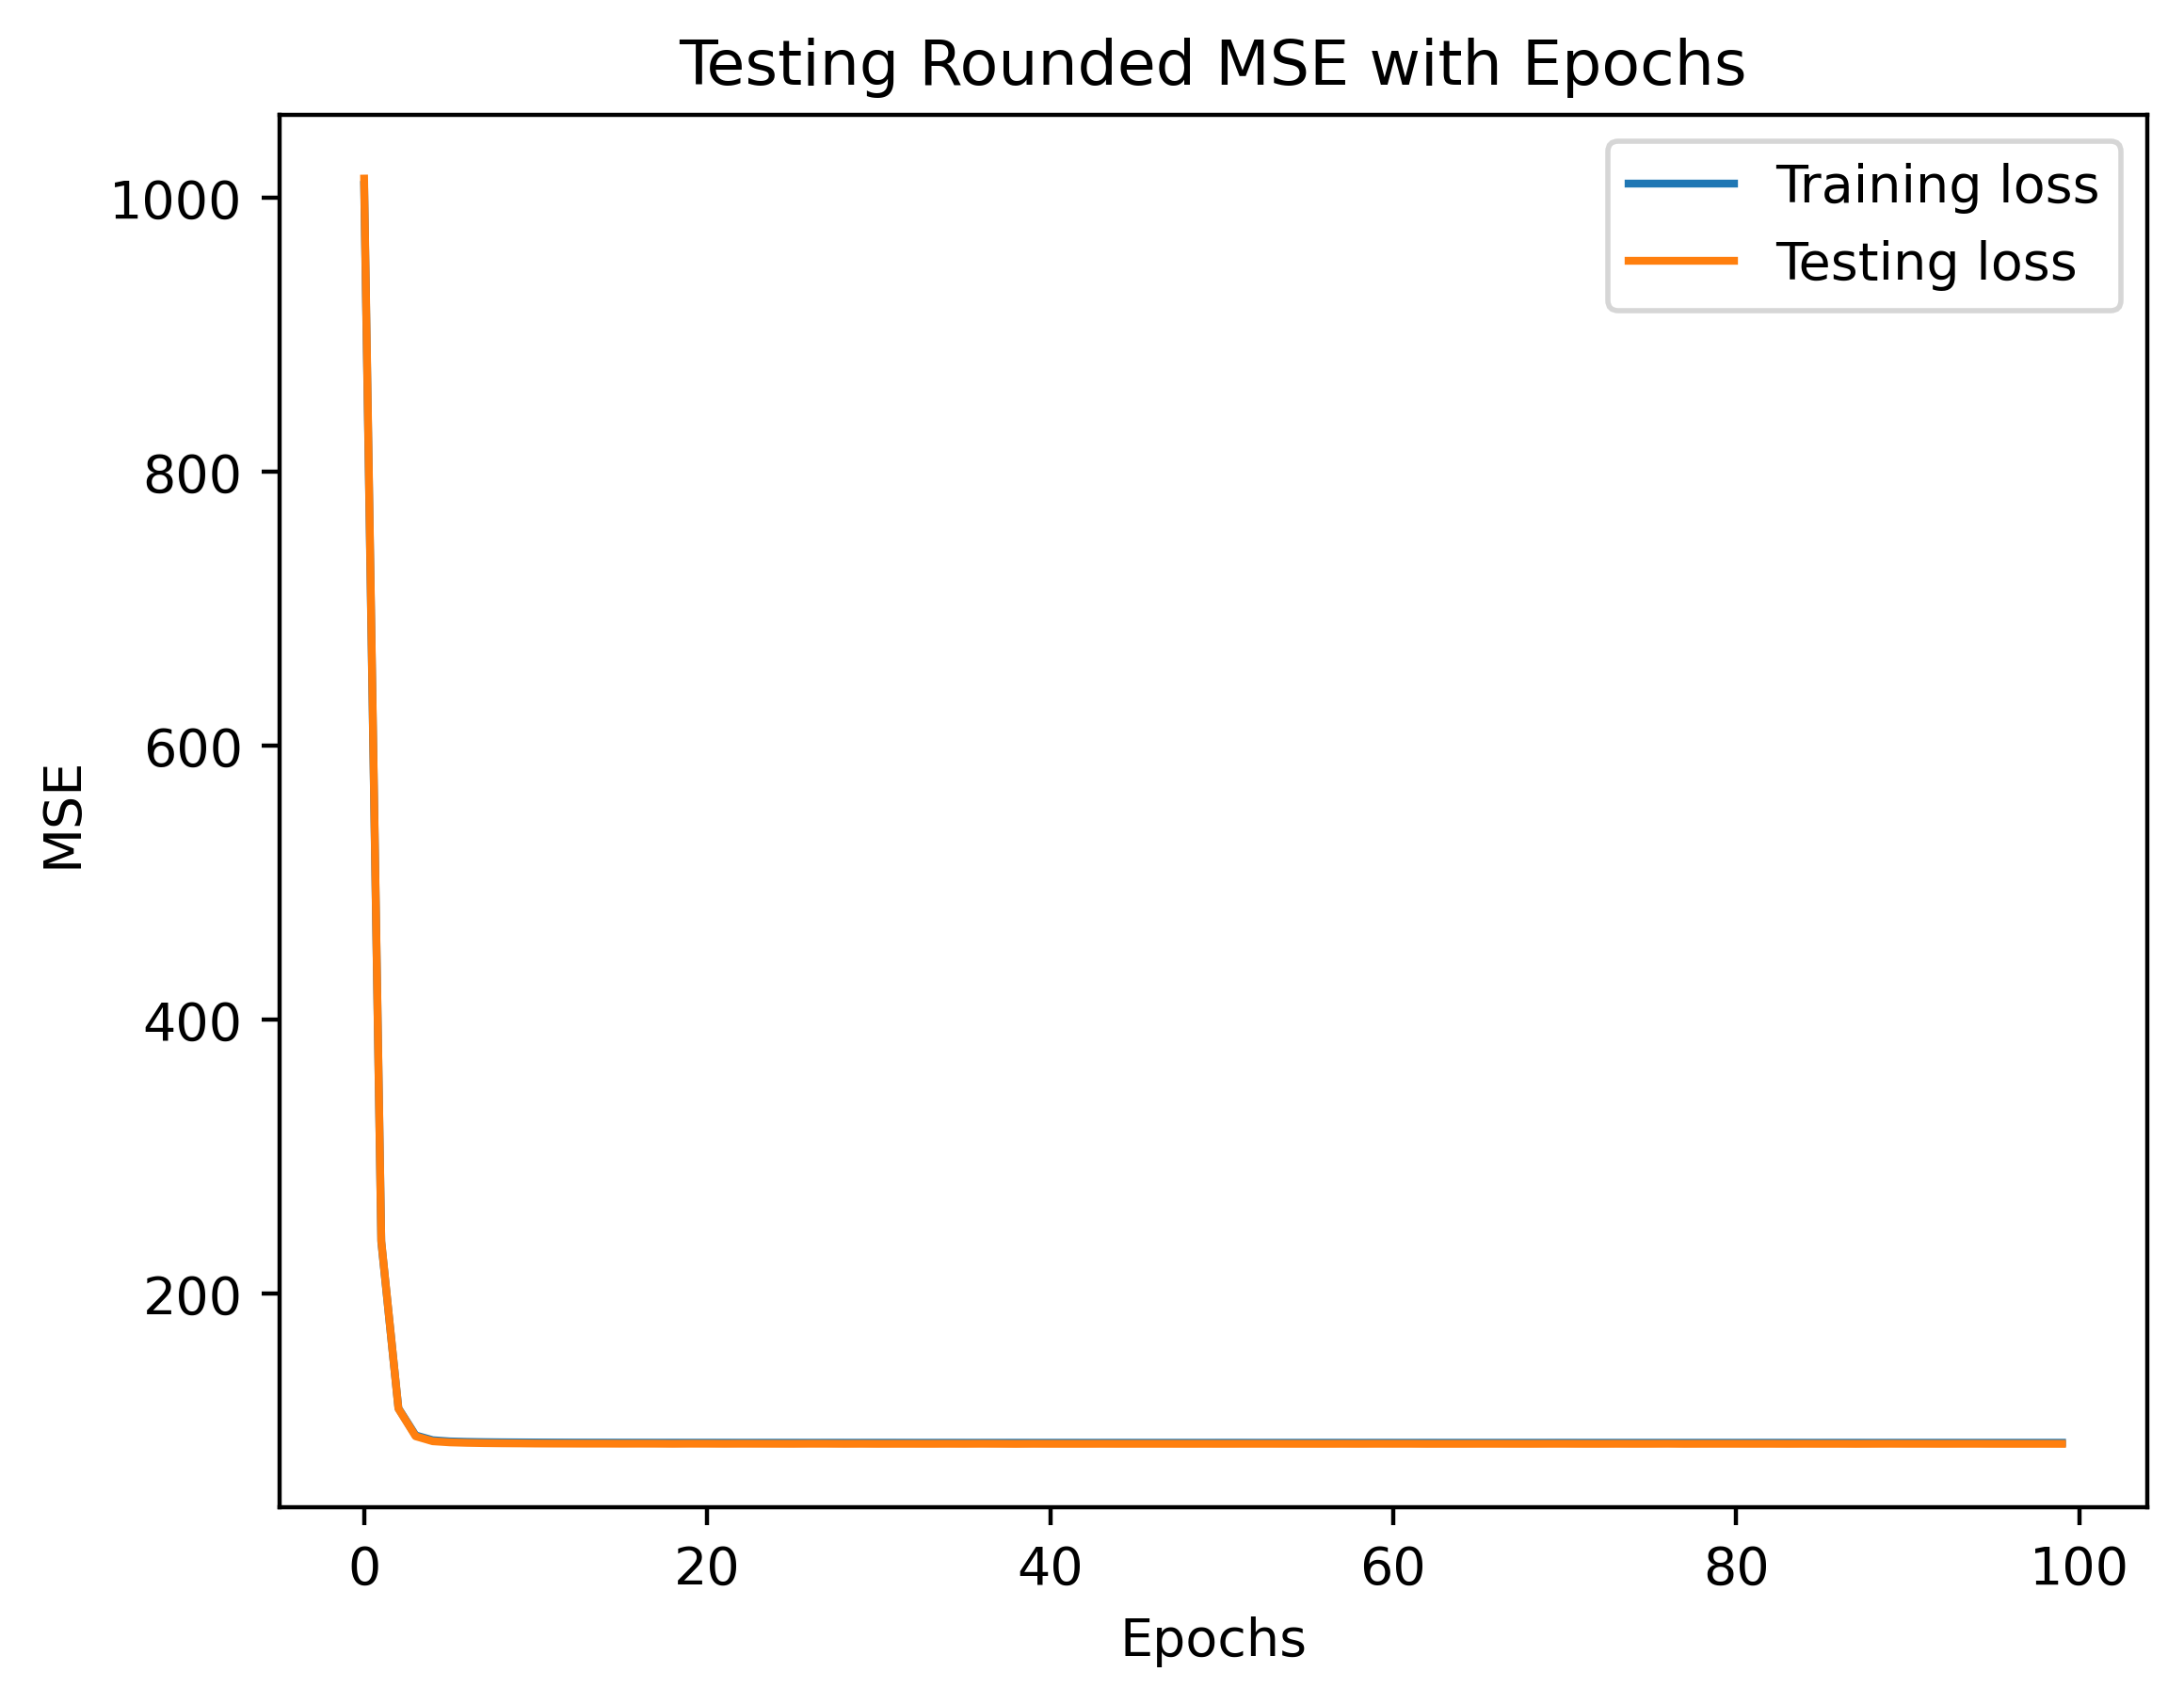

The MSE loss on the training set is 91.34159632877162
The MSE loss on the testing set is 90.51403226743624


In [17]:
#Calls the tune_ridge_parameters function to find the best hyperparameters
tune_ridge_parameters(train_x, train_y)

#Calls the Ridge class to train the model with the best hyperparameters
best_ridge_model = Ridge(learning_rate=0.01, epochs = 100, batch_size = 10000, alpha = 0.3)

#Calls the fit function to train the model and plot the MSE loss
best_ridge_model.fit(train_x, train_y, test_x, test_y)

#Plots the MSE loss for the training and testing sets
best_ridge_model.plot_cost_mse()

#Prints the MSE loss for the training and testing sets
print("The MSE loss on the training set is %s"%(best_ridge_model.train_loss[-1]))
print("The MSE loss on the testing set is %s"%(best_ridge_model.test_loss[-1]))

In [18]:
def pseudoinverse(trainFeat, trainYears, testFeat, testYears):
    alpha=0.001
    # Finding weights using pseudoinverse (Bias is included as a Feature)
    weights_pseudoinverse = np.linalg.inv(np.transpose(trainFeat) @ trainFeat + alpha*np.identity(trainFeat.shape[1])) @ np.transpose(trainFeat) @ trainYears

    # Predicting using pseudoinverse
    y_predict_pseudoinverse = testFeat @ weights_pseudoinverse

    #Calculating MSE from pseudoinverse
    error_pseudoinverse = musicMSE(y_predict_pseudoinverse, testYears)
    
    
    return print(error_pseudoinverse)


In [19]:
#Calls the pesudoinverse function to find the MSE loss
pseudoinverse(trainFeat, trainYears, testFeat, testYears)

90.54777168755206


### Using modern libraries and Tools 

An attempt at using modern libraries and tools to compare results made in this homework.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error


def fit(train_x, train_y, test_x, test_y):
    # Initialize Ridge model
    ridge_reg = Ridge(alpha=0.3, solver='lsqr')

    # Set hyperparameters
    epochs = 100
    batch_size = 10000

    # Initialize lists to store training and validation accuracy and loss
    train_loss, val_loss = [], []
    train_acc, val_acc = [], []

    # Train the model
    for epoch in range(epochs):
        for batch_idx in range(0, len(train_x), batch_size):
            batch_x = train_x[batch_idx:batch_idx+batch_size]
            batch_y = train_y[batch_idx:batch_idx+batch_size]

            ridge_reg.fit(batch_x, batch_y)

        # Calculate training and validation accuracy and loss
        train_y_pred = ridge_reg.predict(train_x)
        train_loss.append(mean_squared_error(train_y, train_y_pred))
        train_acc.append(ridge_reg.score(train_x, train_y))

        val_y_pred = ridge_reg.predict(test_x)
        val_loss.append(mean_squared_error(test_y, val_y_pred))
        val_acc.append(ridge_reg.score(test_x, test_y))

    # Plot accuracy and loss over time
    epochs_range = np.arange(epochs)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label='Train')
    plt.plot(epochs_range, val_acc, label='Test')
    plt.legend(loc='lower right')
    plt.title('Accuracy over time')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label='Train')
    plt.plot(epochs_range, val_loss, label='Test')
    plt.legend(loc='upper right')
    plt.title('Loss over time')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


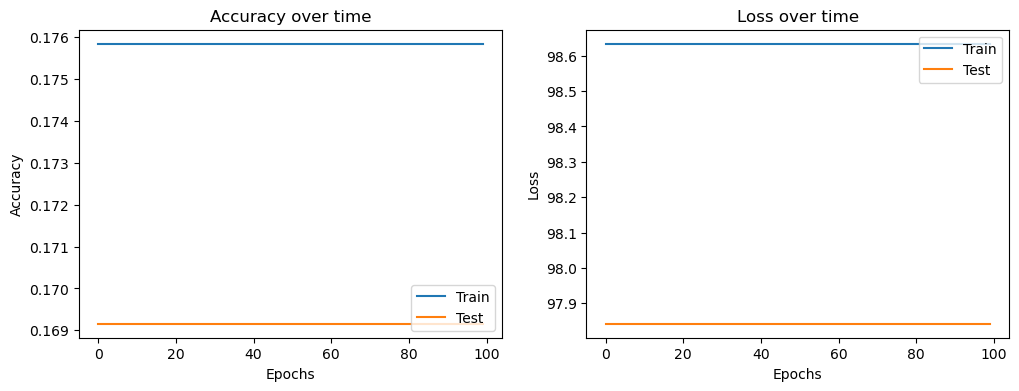

In [21]:
fit(train_x, train_y, test_x, test_y)

### Part 4 - Implementing L1 Weight Decay 
Implement lasso regression using stochastic gradient descent with mini-batches. Tune the
learning rate and weight decay factor. Subsequently, show the train and test loss as a
function of epochs, where the number of epochs should be chosen to ensure the train loss
is minimized.

In [22]:
class Lasso(Regression):
    def __init__(self,learning_rate=0.01, epochs = 1000, batch_size = 1, alpha = 0):
        self.n = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
    def fit(self, X: np.ndarray, Y: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> None:
        """
        Fit Ridge regression model to training data and evaluate on test data.

        Args:
            X (ndarray): Training input data of shape (n_samples, n_features).
            Y (ndarray): Training output data of shape (n_samples, n_targets).
            X_test (ndarray): Test input data of shape (n_samples_test, n_features).
            Y_test (ndarray): Test output data of shape (n_samples_test, n_targets).

        Returns:
            None
        """
        #set the seed for reproducibility
        np.random.seed(1)

        # Set the value of n equal to the number of samples in X
        self.n = X.shape[0]

        # Initialize weight to a random normal distribution with mean=0 and standard deviation=0.01
        self.weight = np.random.normal(0, 0.01,(Y.shape[1], X.shape[1]-1))

        # Insert a zero in the first column of weight and reshape it to have one row and X.shape[1] columns
        self.weight = np.insert( self.weight,0,0).reshape(1, X.shape[1])

        # Initialize empty arrays to store training and test losses
        self.train_loss = []
        self.test_loss =[]

        # Initialize delta_w to a zero array of shape (Y.shape[1], X.shape[1])
        self.delta_w = np.zeros((Y.shape[1], X.shape[1]))

         # Loop through the number of epochs
        for _ in range(self.epochs):

            # Create mini-batches of size batch_size from X and Y
            batches = Regression.create_mini_batches(X, Y, self.batch_size)

            # Loop through the mini-batches
            for i in range(len(batches)-1):

                # Get the current mini-batch
                batch  = batches[i]

                # Separate the input and output of the mini-batch
                cur_x = batch[0]
                cur_y = batch[1]

                # Calculate delta_w using Lasso regularization and divide by batch_size
                self.delta_w = (2 * (cur_x.dot(self.weight.T) - cur_y).T.dot(cur_x)  +  self.alpha* ((self.weight+1e-8) / np.absolute(self.weight+1e-8)))/self.batch_size
                self.weight -=  self.learning_rate* self.delta_w

            # Calculate the training loss and append it to the training loss array
            predict_train = self.predict(X)

            # Calculate the test loss and append it to the test loss array
            self.train_loss.append(musicMSE(predict_train, Y))

            # Calculate the test loss and append it to the test loss array
            predict_test = self.predict(X_test)

            # Calculate the test loss and append it to the test loss array
            self.test_loss.append(musicMSE(predict_test, Y_test))


In [23]:
from sklearn.model_selection import train_test_split

#Define the hyperparameters
lr = [0.01, 0.05, 0.1]
batch_size = [500,1000, 5000, 10000, 20000]
lambda_lst = [0, 0.1,0.5, 0.8]

#Defines teh function to tune the hyperparameters
def tune_Lasso_parameter(train_x, train_y):
    train_x, develop_x,  train_y, develop_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

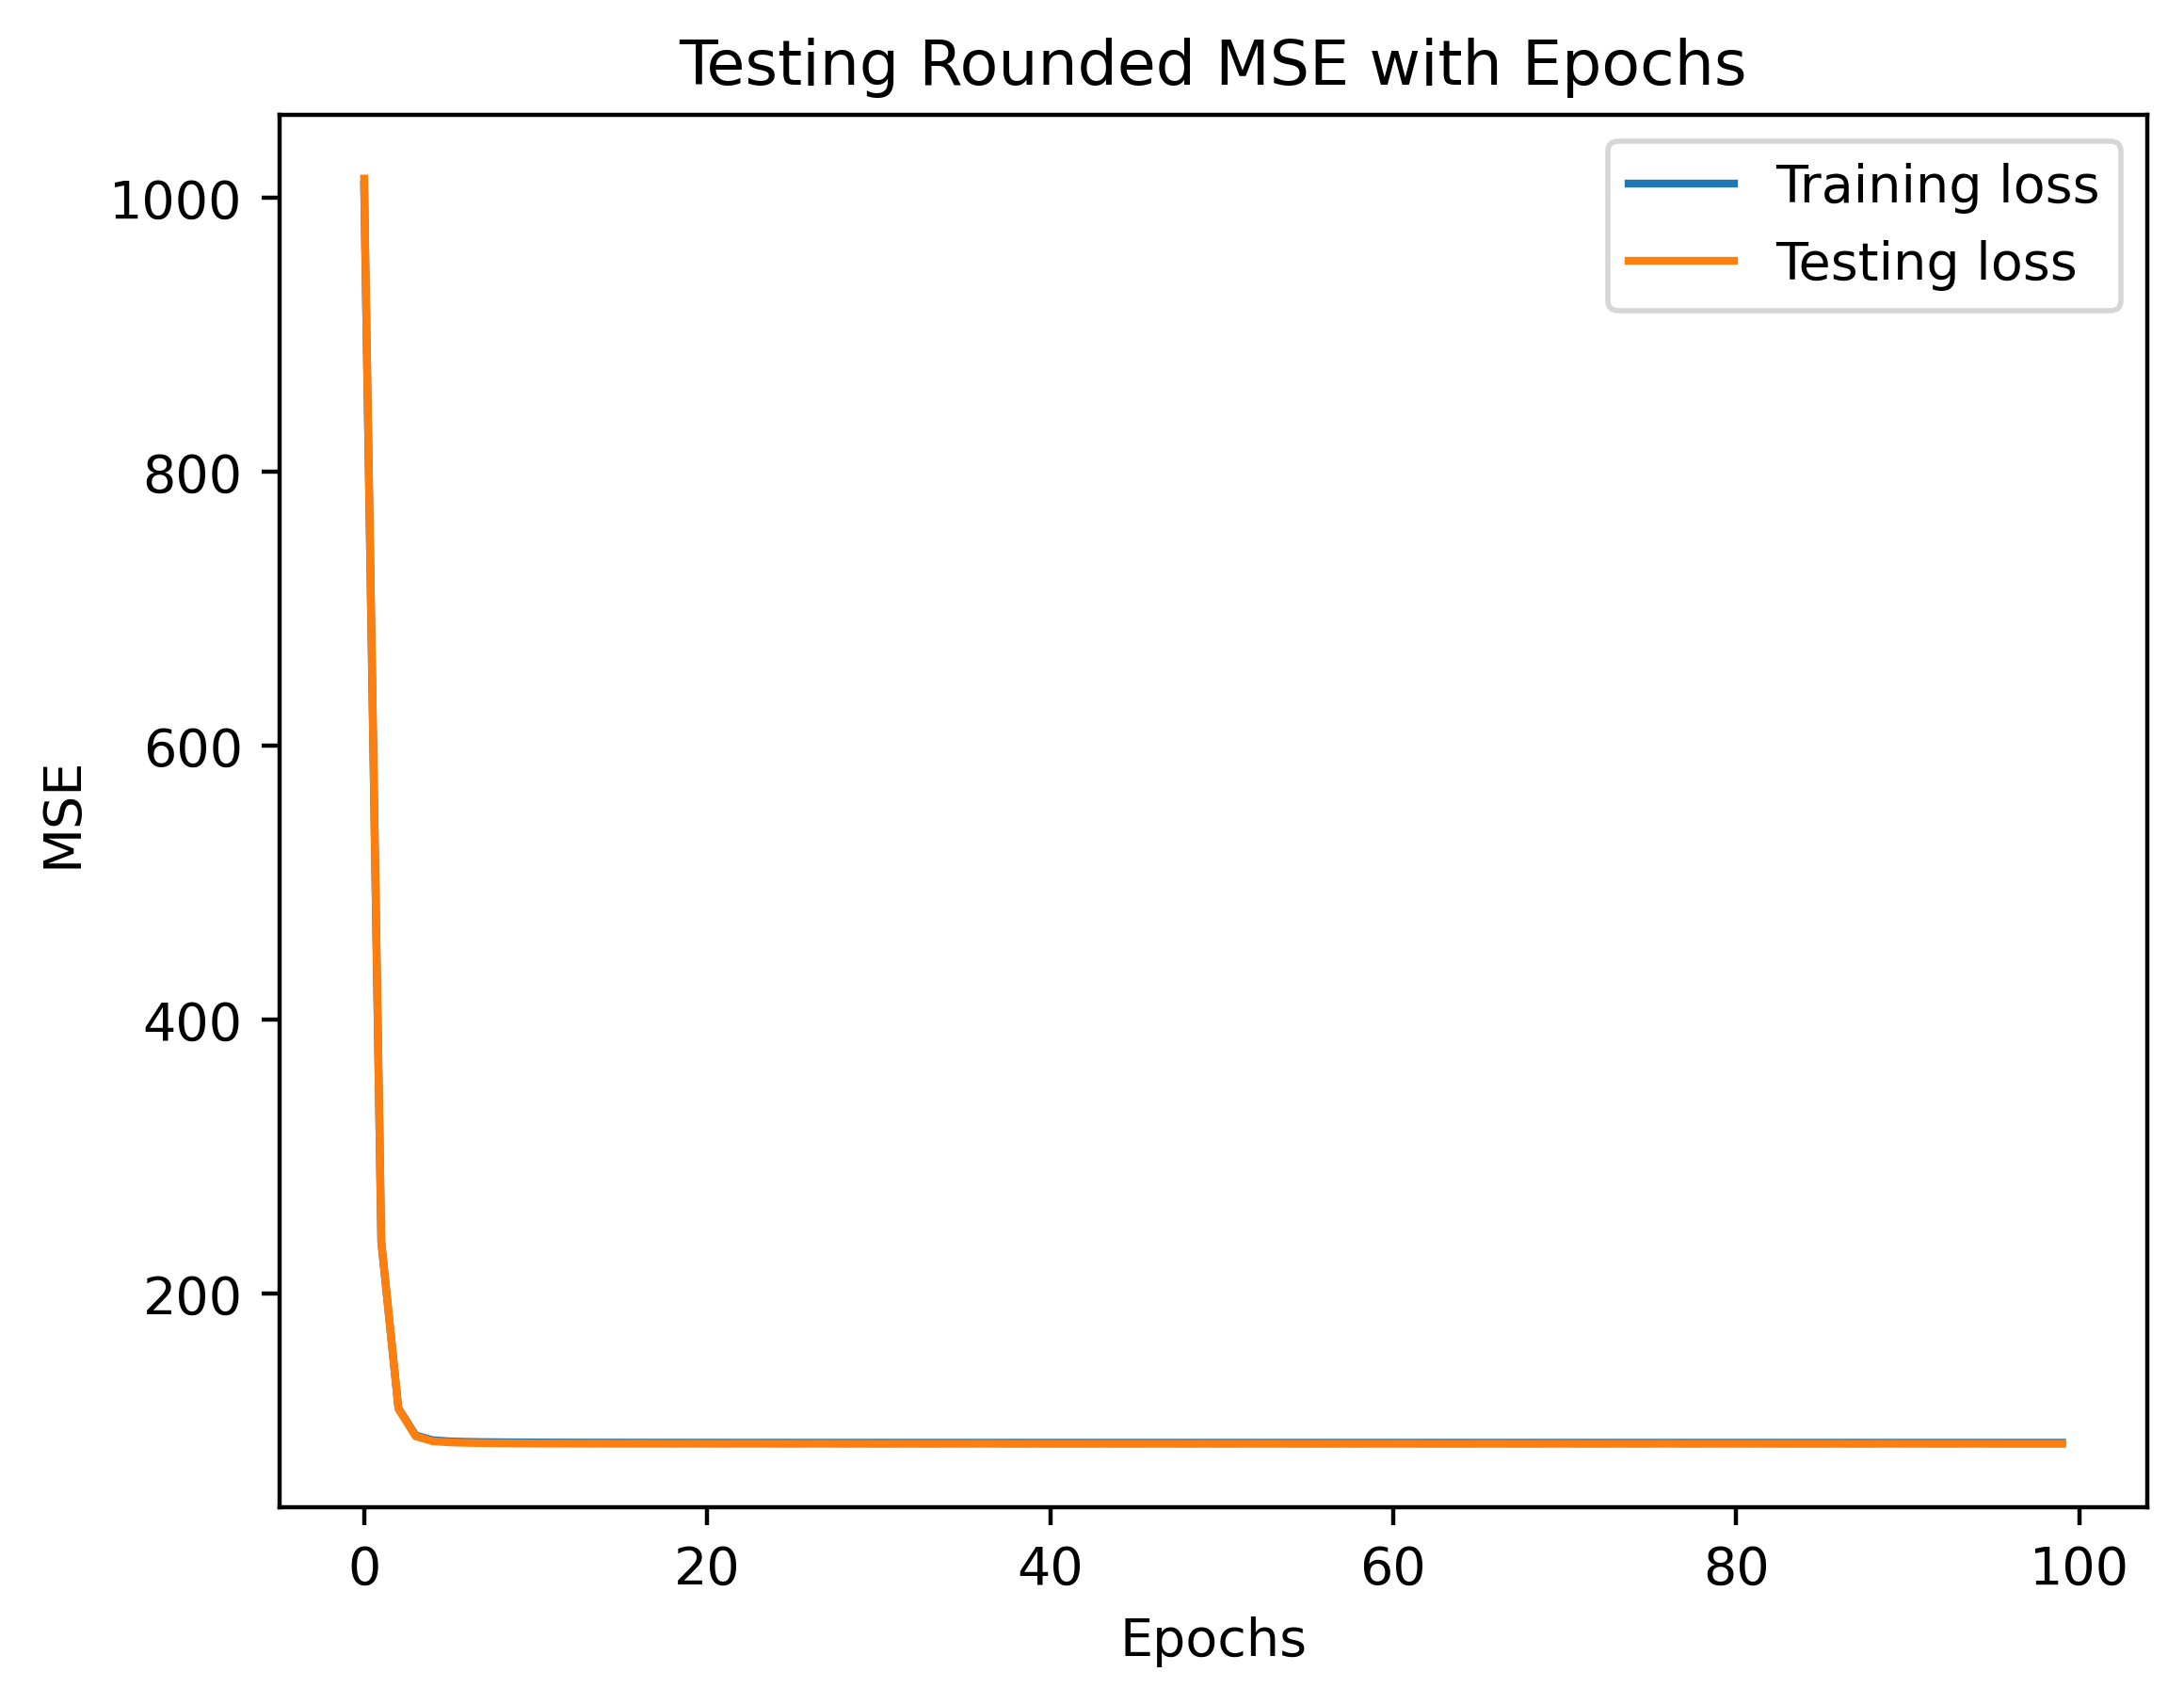

The MSE loss on the training set is 91.34042534838284
The MSE loss on the testing set is 90.51316069803025


In [24]:
#Tunes the hyperparameters
tune_Lasso_parameter(train_x, train_y)

#Define the best model
best_lasso_model = Lasso(learning_rate=0.01, epochs = 100, batch_size = 10000, alpha = 0.3)
best_lasso_model.fit(train_x, train_y, test_x, test_y)
best_lasso_model.plot_cost_mse()

#Print the test loss
print("The MSE loss on the training set is %s"%(best_lasso_model.train_loss[-1]))
print("The MSE loss on the testing set is %s"%(best_lasso_model.test_loss[-1]))

### Part 5 - Implementing Count Regression 

Implement count regression. Minimize the loss using SGD with mini-batches to find an
optimal w. Compute the gradient update rule and show it. Plot the train and test loss
as a function of epochs. Compute the train and test MSE using the function we created
earlier.

In [25]:
class Count(Regression):
    def __init__(self,learning_rate=0.01, epochs = 1000, batch_size = 1, alpha = 0):
        self.n = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
    def predict(self, X: Union[List[float],np.ndarray]) -> np.ndarray:
        """
        Predicts the output for the input using the weights.

        Args:
            X: A list or 1D numpy array containing the input features.
        Returns: 
            A 1D numpy array containing the predicted output.
        """
        return np.exp(X.dot(self.weight.T ))
    def fit(self, X: np.ndarray, Y: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> None:
        """
        Fit Ridge regression model to training data and evaluate on test data.

        Args:
            X (ndarray): Training input data of shape (n_samples, n_features).
            Y (ndarray): Training output data of shape (n_samples, n_targets).
            X_test (ndarray): Test input data of shape (n_samples_test, n_features).
            Y_test (ndarray): Test output data of shape (n_samples_test, n_targets).

        Returns:
            None
        """
        #set the seed for reproducibility
        np.random.seed(1)

        # Set the value of n equal to the number of samples in X
        self.n = X.shape[0]

        # Initialize weight to a random normal distribution with mean=0 and standard deviation=0.01
        self.weight = np.random.normal(0, 0.01, (Y.shape[1], (X.shape[1]-1) ))

        # Insert a zero in the first column of weight and reshape it to have one row and X.shape[1] columns
        self.weight = np.insert( self.weight,0,0).reshape(1, X.shape[1])

        # Initialize empty arrays to store training and test losses
        self.train_loss = []
        self.test_loss =[]

        # Initialize delta_w to a zero array of shape (Y.shape[1], X.shape[1])
        self.delta_w = np.zeros((Y.shape[1], X.shape[1]))

        # Loop through the number of epochs
        for _ in range(self.epochs):

            # Create mini-batches of size batch_size from X and Y
            batches = Regression.create_mini_batches(X, Y, self.batch_size)

            # Loop through the mini-batches
            for i in range(len(batches)-1):

                # Get the current mini-batch
                batch  = batches[i]

                # Separate the input and output of the mini-batch
                cur_x = batch[0]
                cur_y = batch[1]

                # Calculate delta_w using Lasso regularization and divide by batch_size
                self.delta_w =   cur_x.T.dot(np.exp(cur_x.dot(self.weight.T))- cur_y)/self.n
                self.weight -=  self.learning_rate* self.delta_w.T

            # Calculate the training loss and append it to the training loss array
            predict_train = self.predict(X)

            # Calculate the test loss and append it to the test loss array
            self.train_loss.append(musicMSE(predict_train, Y))

            # Calculate the test loss and append it to the test loss array
            predict_test = self.predict(X_test)

            # Calculate the test loss and append it to the test loss array
            self.test_loss.append(musicMSE(predict_test, Y_test))

In [26]:
from sklearn.model_selection import train_test_split

#Define the hyperparameters
lr = [0.001,0.01,  0.05, 0.1]
batch_size = [500,1000, 5000, 10000, 20000]

#Defines teh function to tune the hyperparameters
def tune_count_parameter(train_x, train_y):
    train_x, _,  train_y, _ = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

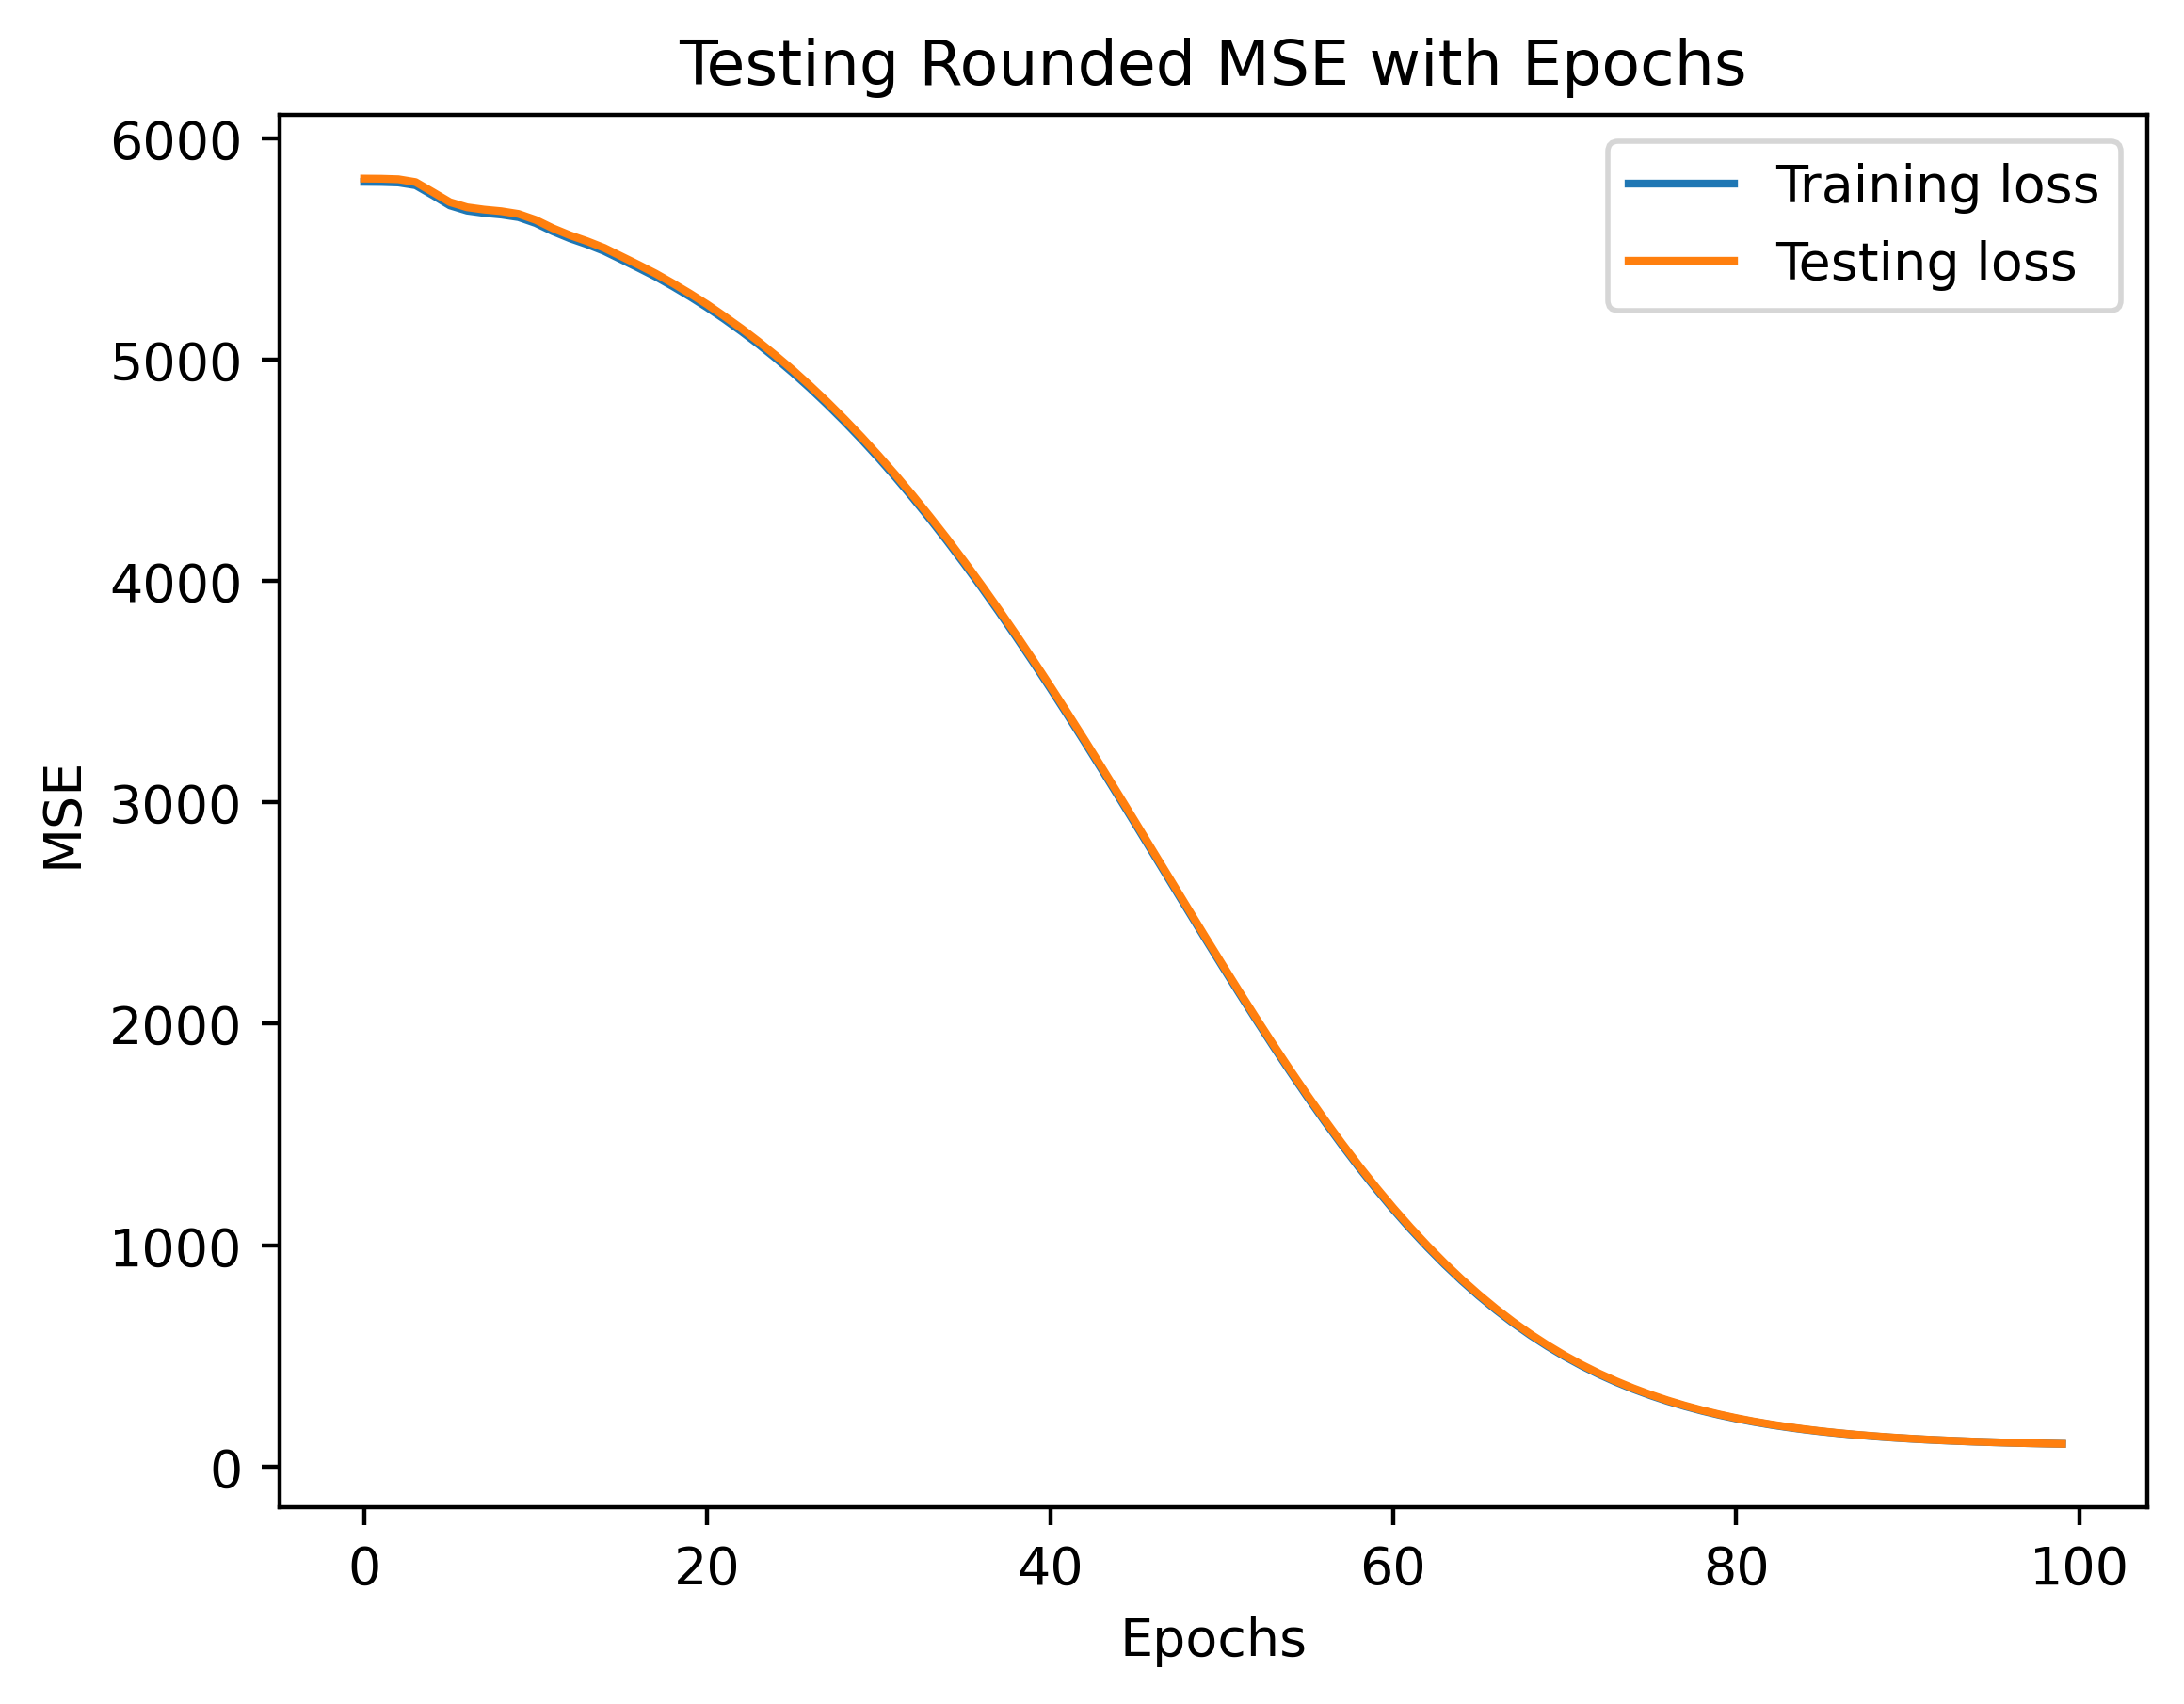

The MSE loss on the training set is 102.19235778949957
The MSE loss on the testing set is 102.1289922720846


In [27]:
#Tunes the hyperparameters
tune_count_parameter(train_x, train_y)

#Define the best model
best_count_model = Count(learning_rate=0.001, epochs = 100, batch_size = 20000)
best_count_model.fit(train_x, train_y, test_x, test_y)
best_count_model.plot_cost_mse()

#Print the test loss
print("The MSE loss on the training set is %s"%(best_count_model.train_loss[-1]))
print("The MSE loss on the testing set is %s"%(best_count_model.test_loss[-1]))

### Part 6: Model Comparison 
Plot a histogram of the weights for the ridge, lasso, and count regression models. Discuss
how the weights differ.<br>
<br>Discuss and compare the behaviors of the models. Are there certain periods (ranges of
years) in which models perform better than others? Where are the largest errors across
models. Did regularization help for some models but not others?

In [28]:
def plot_weight_hist(best_ridge_model, best_lasso_model) -> None:
    """
    Plots a histogram of the weights for Ridge and Lasso regression models.

    Args:
        best_ridge_model: A trained Ridge regression model.
        best_lasso_model: A trained Lasso regression model.

    Returns:
        None
    """
    # Defines the ridge and lasso weights
    ridge_weights: np.ndarray = best_ridge_model.weight[:,1:]
    lasso_weights: np.ndarray = best_lasso_model.weight[:,1:]

    #Defines the figure
    plt.figure(dpi = 400)

    #Plots the histogram
    plt.hist(ridge_weights.flatten(),bins = 200, label = "Ridge Regression Weight",alpha=0.5)
    plt.hist(lasso_weights.flatten(),bins = 200, label = "Lasso Regression Weight",alpha=0.5)

    #Adds labels and legend
    plt.title("Histogram for Ridge and Lasso Regression weight")
    plt.legend()
    plt.show()

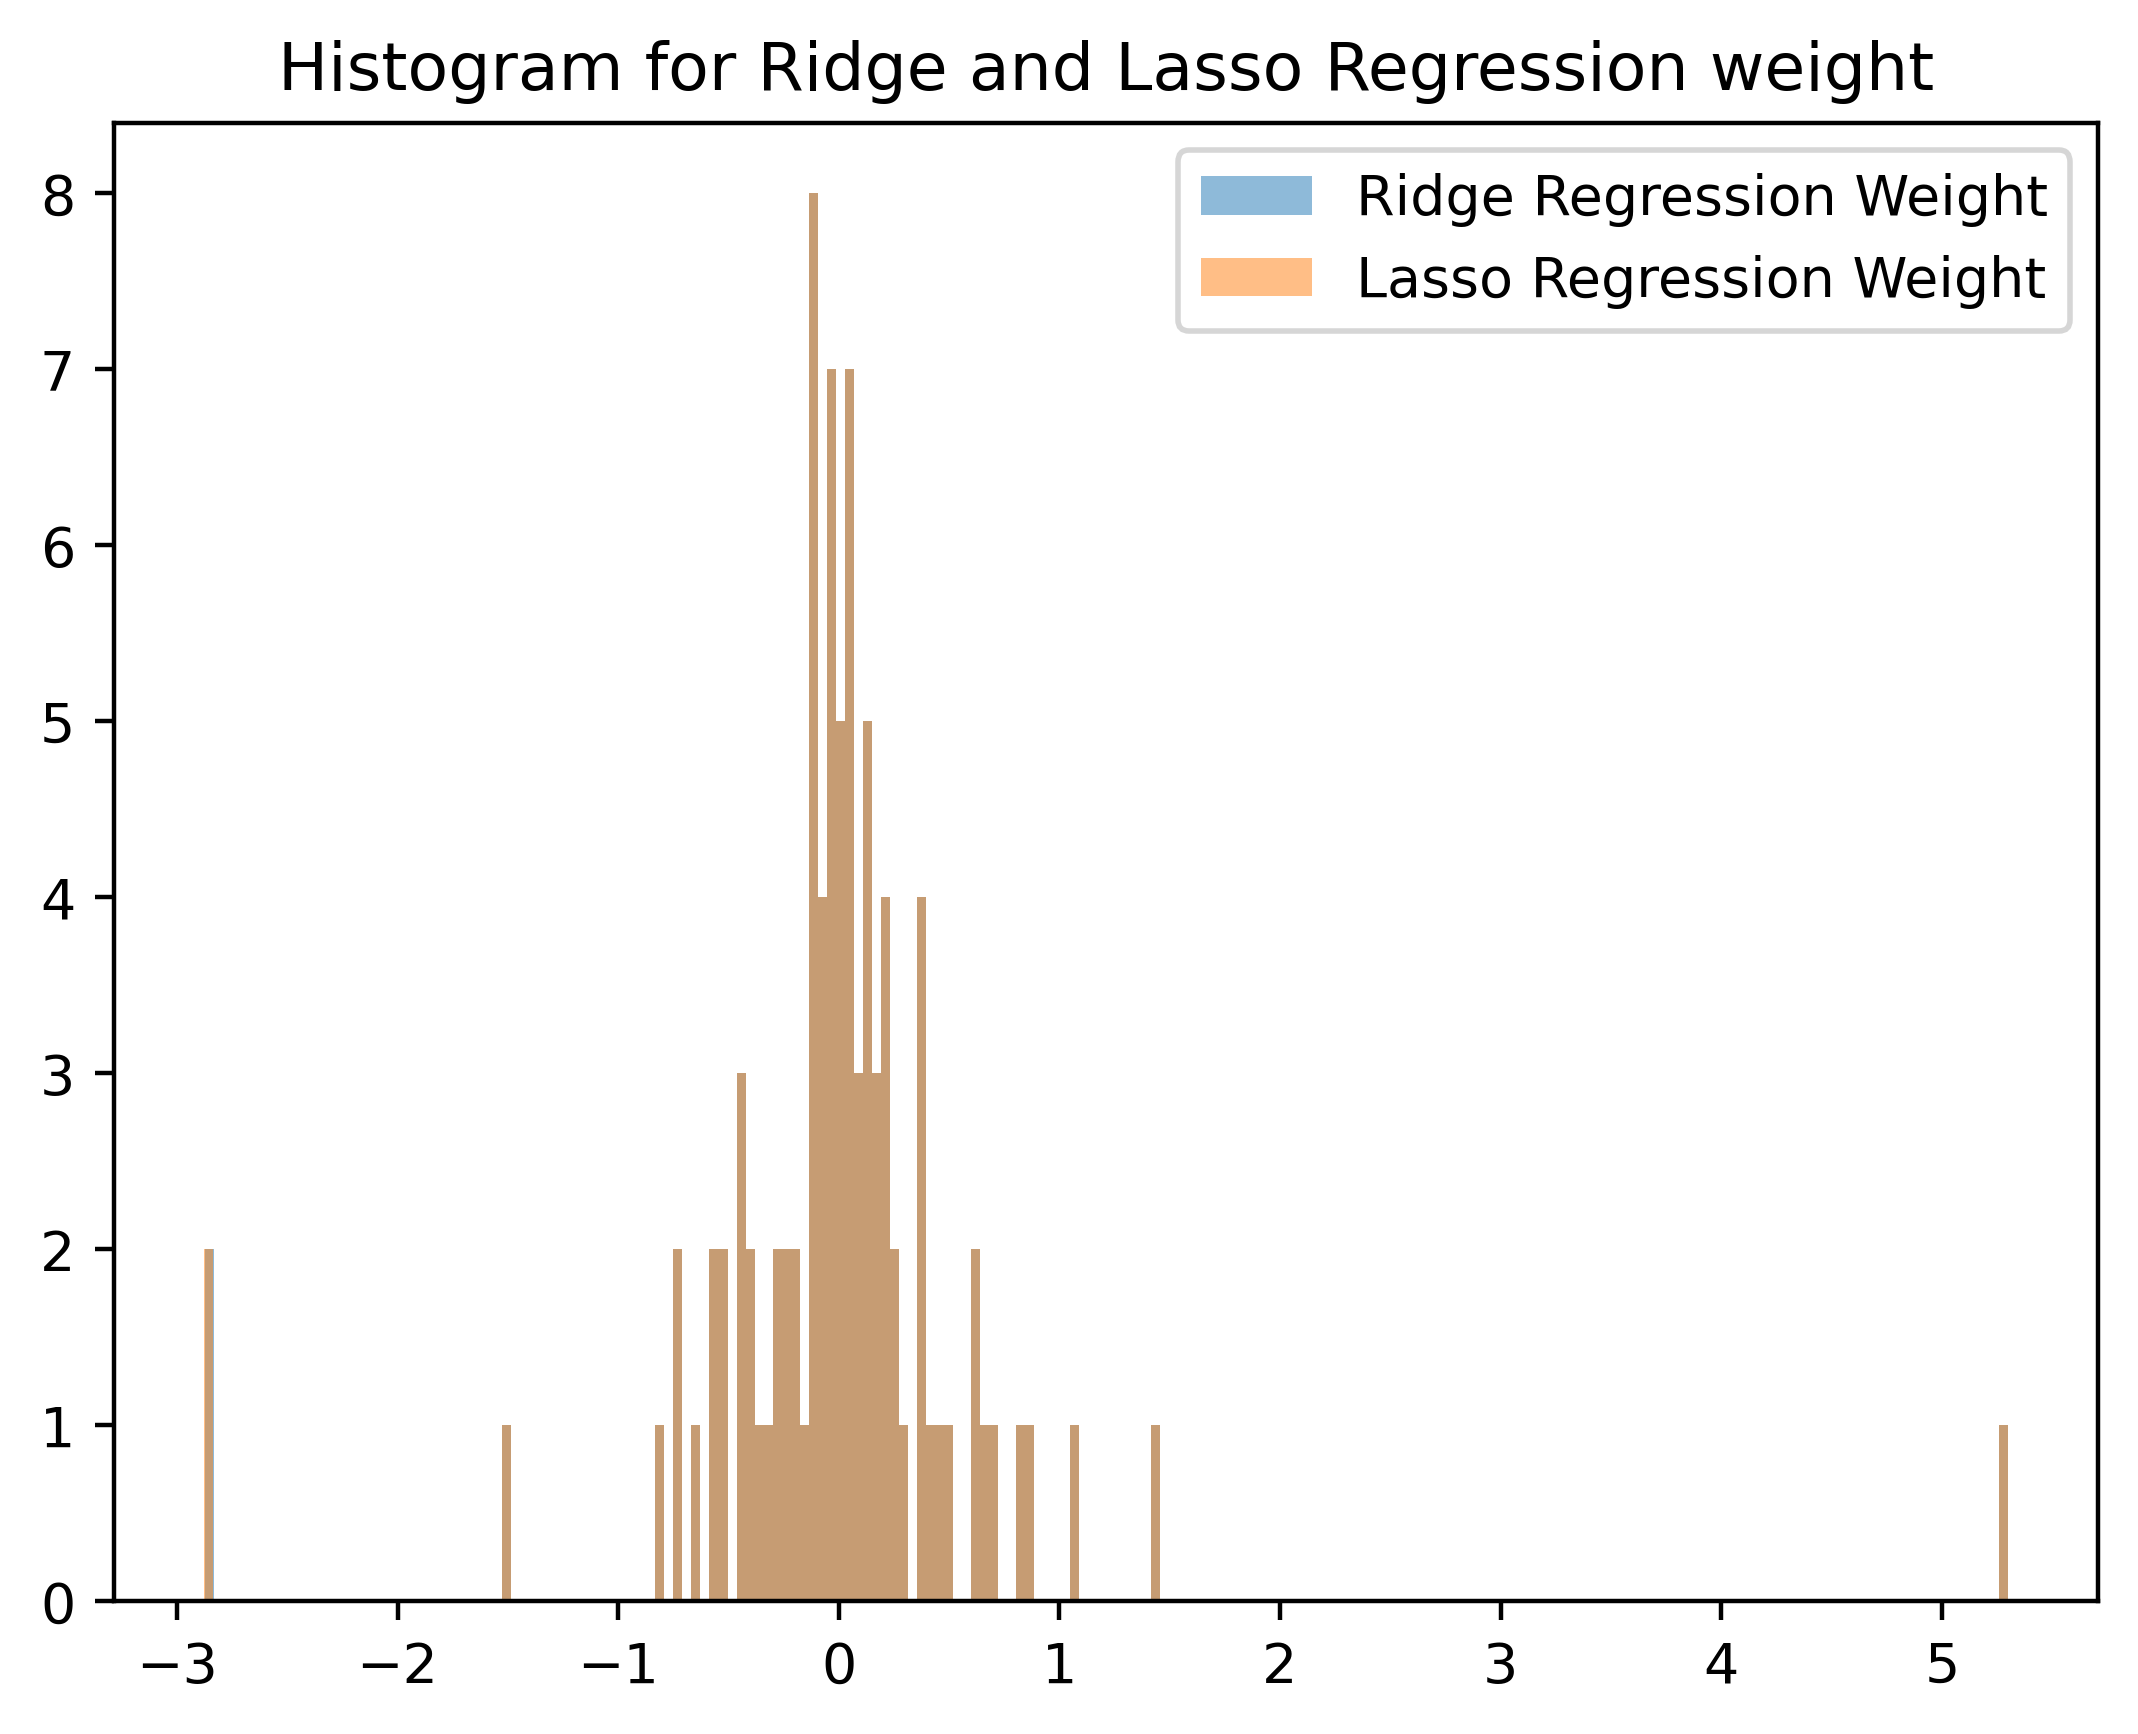

In [29]:
#Calls the function
plot_weight_hist(best_ridge_model, best_lasso_model)

In [53]:
def plot_weight_distribution(ridge_weights: np.ndarray, lasso_weights: np.ndarray) -> None:
    """
    Plots the weight distribution of two models (ridge and lasso) using a histogram.

    Args:
        ridge_weights (np.ndarray): The weights of the best ridge model.
        lasso_weights (np.ndarray): The weights of the best lasso model.

    Returns:
        None
    """
    #Defines the lasso and ridge weights
    ridge_weights = ridge_weights.weight[:,1:]
    lasso_weights = lasso_weights.weight[:,1:]
    ridge_weights = ridge_weights.flatten()
    lasso_weights = lasso_weights.flatten()

    #Defines the figure
    plt.figure()
    plt.title("Weight Distribution")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    bins = np.linspace(-3, 3, 50)
    plt.hist(
        [ridge_weights, lasso_weights],
        bins,
        alpha = 0.5,
        label = ["Ridge Weights", "Lasso Weights"],
        edgecolor = "black"
        )
    plt.legend()
    plt.show()

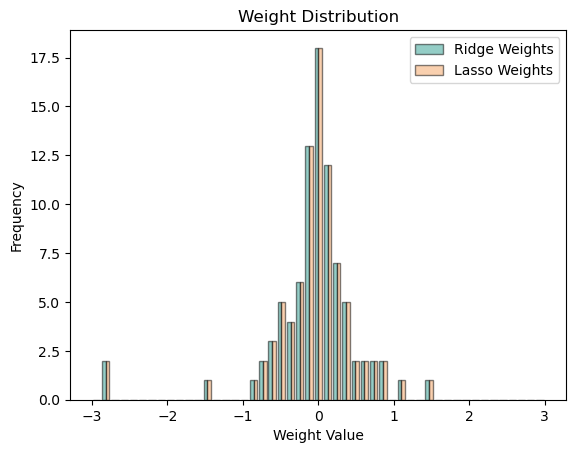

In [54]:
#Calls the function
plot_weight_distribution(best_ridge_model, best_lasso_model)

## Problem 5: Softmax Properties

### Part 1: 

Recall the softmax function, which is the most common activation function used for the
output of a neural network trained to do classification. In a vectorized form, it is given
by<br>
<br> softmax (a) = <br>
<br>where a ∈R<sup>K</sup> . The exp function in the numerator is applied element-wise and aj denotes
the j’th element of a.<br>

<br>Show that the softmax function is invariant to constant offsets to its input, i.e.,
softmax (a + c1) = softmax (a) ,
where c ∈Ris some constant and 1 denotes a column vector of 1’s.

<b> Solution: </b>


### Part 2:
In practice, why is the observation that the softmax function is invariant to constant offsets
to its input important when implementing it in a neural network?

<b> Solution: </b>

## Problem 6: Implementing a Softmax Classifier
For this problem, you will use the 2-dimensional Iris dataset. Download iris-train.txt
and iris-test.txt from Canvas. Each row is one data instance. The first column is the
label (1, 2 or 3) and the next two columns are features.<br>
<br>Write a function to load the data and the labels, which are returned as NumPy arrays.

### Part 1:Implementation & Evaluation 
Recall that a softmax classifier is a shallow one-layer neural network of the form:

<br>where x is the vector of inputs, K is the total number of categories, and wk is the weight
vector for category k. The bias has been omitted, but you can incorporate it by appending
a ‘1’ to each x.<br>
<br>In this problem you will implement a softmax classifier from scratch. Do not use a
toolbox. Use the softmax (cross-entropy) loss with L2 weight decay regularization. Your
implementation should use stochastic gradient descent with mini-batches and momentum
to minimize softmax (cross-entropy) loss of this single layer neural network. To make your
implementation fast, do as much as possible using matrix and vector operations. This will
allow your code to use your environment’s BLAS. Your code should loop over epochs and
mini-batches, but do not iterate over individual elements of vectors and matrices. Try
to make your code as fast as possible. I suggest using profiling and timing tools to do
this.<br>
<br>Train your classifier on the Iris dataset for 1000 epochs. You should either subtract the
mean of the training features from the train and test data or normalize the features to be
between -1 and 1 (instead of 0 and 1). Initialize your weights from a Gaussian distribution
Hand tune the hyperparameters (i.e., learning rate, mini-batch size, momentum rate, and
L2 weight decay factor) to achieve the best possible training accuracy. During a training
epoch, your code should compute the mean per-class accuracy for the training data and
the loss. After each epoch, compute the mean per-class accuracy for the testing data and
the loss as well. The test data should not be used for updating the weights.<br>
<br>After you have tuned the hyperparameters, generate two plots next to each other. The one
on the left should show the cross-entropy loss during training for both the train and test
sets as a function of the number of training epochs. The plot on the right should show the
mean per-class accuracy as a function of the number of training epochs on both the train
set and the test set.<br>
<br>What is the best test accuracy your model achieved? What hyperparameters did you use?<br>
<br>Would early stopping have helped improve accuracy on the test data?<br>


<b>NOTE another class was made and with help from Michelle Wang, Nick Pacia Github copilot.

In [45]:
class Softmax:
    """A softmax classifier with L2 regularization and momentum gradient descent optimizer.

    Args:
        epochs: Number of epochs to train the model.
        learning_rate: The learning rate used to update the model's weights.
        batch_size: The size of the mini-batches used during training.
        alpha: The regularization strength.
        momentum: The momentum parameter used to accelerate learning.

    Attributes:
        epochs (int): Number of epochs to train the model.
        learning_rate (float): The learning rate used to update the model's weights.
        batch_size (int): The size of the mini-batches used during training.
        alpha (float): The regularization strength.
        momentum (float): The momentum parameter used to accelerate learning.
        vel (ndarray): Velocity of the gradient used in momentum gradient descent optimizer.
        weight (ndarray): The weights of the model.
    """

    def __init__(self, epochs: int, learning_rate: float, batch_size: int, alpha: float, momentum: float):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.alpha = alpha
        self.momentum = momentum
        self.vel: np.ndarray = None
        self.weight: np.ndarray = None

    def train(self, x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[List[float], List[float], List[float], List[float]]:
        """Trains the model using the given training data and returns the training and testing losses and accuracies.

        Args:
            x_train: The training input data.
            y_train: The training target data.
            x_test: The testing input data.
            y_test: The testing target data.

        Returns:
            Tuple containing the training losses, testing losses, training accuracies and testing accuracies.
        """
        #  define the number of classes and the dimension of the input data
        dim: int = x_train.shape[1]

        #  convert the target data to one-hot encoding
        label: np.ndarray = np.unique(y_train)

        #  define the number of classes
        classes_num: int = len(label)

        #  convert the target data to one-hot encoding
        y_train_one_hot: np.ndarray = self.to_one_hot(y_train, classes_num)

        #  convert the target data to one-hot encoding
        y_test_one_hot: np.ndarray = self.to_one_hot(y_test, classes_num)

        #  initialize the weights and the velocity
        self.weight: np.ndarray = 0.001 * np.random.rand(dim, classes_num)

        #  initialize the velocity
        self.vel: np.ndarray = np.zeros(self.weight.shape)

        #  define the lists to store the losses and accuracies
        train_losses: List[float] = []
        test_losses: List[float] = []
        train_accuracies: List[float] = []
        test_accuracies: List[float] = []

        #  train the model for the given number of epochs
        for epoch in range(self.epochs):

            #  train the model for one epoch
            train_loss = self.sgd_momentum(x_train, y_train_one_hot)
            test_loss, _ = self.compute_loss(x_test, y_test_one_hot)

            #  compute the training and testing accuracies
            train_losses.append(train_loss)
            test_losses.append(test_loss)

            #  compute the training and testing accuracies
            train_accuracy: float = self.compute_accuracy(x_train, y_train)
            test_accuracy: float = self.compute_accuracy(x_test, y_test)

            #  append the training and testing accuracies to the lists
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)

            #  print the training and testing losses and accuracies
            print(f"{epoch}\t->\tTrainL : {train_loss:.7f}\t|\tTestL : {test_loss:.7f}\t|\tTrainAcc : {train_accuracy:.7f}\t|\tTestAcc: {test_accuracy:.7f}")

        #  return the training and testing losses and accuracies
        return train_losses, test_losses, train_accuracies, test_accuracies

    def to_one_hot(self, y: np.ndarray, classes_num: int) -> np.ndarray:
        """
        Convert label vector to one-hot encoding.

        Args:
        - y: label vector.
        - classes_num: number of classes.

        Returns:
        - y_mx: one-hot encoding of label vector.
        """
        # convert the target data to one-hot encoding
        y = np.asarray(y, dtype='int32')

        # if the target data is a vector, reshape it to a column vector
        if len(y) > 1:

            # reshape the target data to a column vector
            y = y.reshape(-1)

        # initialize the one-hot encoding matrix
        yMx = np.zeros((len(y), classes_num))
        yMx[np.arange(len(y)), y] = 1

        # return the one-hot encoding matrix
        return yMx

    def compute_softmax_prob(self, scores: np.ndarray) -> np.ndarray:
        """
        Compute softmax probabilities.

        Args:
        - scores: scores matrix.

        Returns:
        - prob: softmax probabilities.
        """

        # subtract the maximum value from the scores to avoid overflow
        scores -= np.max(scores)

        # compute the softmax probabilities
        prob = (np.exp(scores).T / np.sum(np.exp(scores), axis=1)).T

        # return the softmax probabilities
        return prob

    def compute_loss(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, np.ndarray]:
        """
        Compute loss and gradient.

        Args:
        - x: input matrix.
        - y: label vector.

        Returns:
        - total_loss: total loss.
        - grad: gradient of weights.
        """

        # compute the number of samples
        samples = x.shape[0]

        # compute the scores
        temp = np.dot(x, self.weight)

        #   compute the softmax probabilities
        prob = self.compute_softmax_prob(temp)

        # compute the loss
        loss = -np.log(np.max(prob)) * y

        # compute the L2 regularization loss
        L2Loss = (1/2) * self.alpha * np.sum(self.weight * self.weight)

        # compute the total loss
        totalLoss = (np.sum(loss) / samples) + L2Loss

        # compute the gradient
        grad = ((-1 / samples) * np.dot(x.T, (y - prob))) + (self.alpha * self.weight)

        # return the total loss and the gradient
        return totalLoss, grad

    def compute_accuracy(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Compute classification accuracy.

        Args:
        - x: input matrix.
        - y: label vector.

        Returns:
        - accuracy: classification accuracy.
        """

        # compute the predictions
        pred = self.predict(x)

        # compute the accuracy
        pred = pred.reshape((-1, 1))

        # compute the accuracy
        return np.mean(np.equal(y, pred))
    
    def sgd_momentum(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Perform stochastic gradient descent with momentum.

        Args:
        - x: input matrix.
        - y: label vector.

        Returns:
        - avg_loss: average loss.
        """

        # define the list to store the losses
        losses = []

        # shuffle the data
        randInd = random.sample(range(x.shape[0]), x.shape[0])

        # shuffle the data
        x = x[randInd]
        y = y[randInd]

        # train the model for one epoch
        for i in range(0, x.shape[0], self.batch_size):

            # get the batch
            Xbatch = x[i:i+self.batch_size]
            ybatch = y[i:i+self.batch_size]

            # compute the loss and the gradient
            loss, dw = self.compute_loss(Xbatch, ybatch)

            # update the weights
            self.vel = (self.momentum * self.vel) + (self.learning_rate * dw)

            # update the weights
            self.weight -= self.vel

            # append the loss to the list
            losses.append(loss)

        # return the average loss
        return np.sum(losses) / len(losses)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicts the class labels for the given input data.

        Args:
          x: A numpy array representing the input data.

        Returns:
          A numpy array representing the predicted class labels.
        """
        # compute the scores
        return np.argmax(x.dot(self.weight), 1)
    
    def compute_loss_and_accuracy(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, float, Dict[int, float], np.ndarray]:
        """
        Computes the loss, accuracy, and per-class accuracy for the given input data and labels.

        Args:
          x: A numpy array representing the input data.
          y: A numpy array representing the true class labels.

        Returns:
          A tuple containing the loss (float), accuracy (float), a dictionary of per-class accuracies (Dict[int, float]),
          and the predicted class labels (np.ndarray).
        """
        # compute the scores
        scores = np.dot(x, self.W) + self.b

        # compute the softmax probabilities
        prob = self.softmax(scores)

        # compute the loss
        loss = -np.mean(np.log(prob[range(x.shape[0]), y.astype(int)]))

        # compute the L2 regularization loss
        y_pred = np.argmax(prob, axis=1)

        # compute the accuracy
        clazz_to_accuracy = {}

        # compute the accuracy for each class
        for clazz in np.unique(y).tolist():
          # compute the accuracy for the current class
          clazz_mask = y == clazz

          # compute the accuracy for the current class
          y_pred_clazz = y_pred[clazz_mask]

          # compute the accuracy for the current class
          y_clazz = y[clazz_mask]

          # compute the accuracy for the current class
          clazz_to_accuracy[clazz] = round(np.mean(y_pred_clazz == y_clazz), 4)

        # compute the accuracy
        accuracy = np.mean(y == y_pred)

        # return the loss, accuracy, and the accuracy for each classx
        return loss, accuracy, clazz_to_accuracy, y_pred



def create_figure(train_losses: List[float], test_losses: List[float], train_accuracies: List[float], test_accuracies: List[float]):
    """
    Creates a figure containing two subplots: one for the training and test losses and another for the training and test accuracies.

    Args:
      train_losses: A list of floats representing the training loss for each epoch.
      test_losses: A list of floats representing the test loss for each epoch.
      train_accuracies: A list of floats representing the training accuracy for each epoch.
      test_accuracies: A list of floats representing the test accuracy for each epoch.
    """
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train loss")
    plt.plot(test_losses, label="Test loss")
    plt.legend(loc='best')
    plt.title("Loss varying with Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.legend(loc='best')
    plt.title("Mean per class Accuracy varying with Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Mean per class Accuracy")
    plt.show()

def load_data(file_path: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Load data from a file, shuffle the data, split it into X and y, and normalize it.
    :param file_path: The path of the file containing the data.
    :return: A tuple of two numpy arrays: X and y.
    """
    # load data
    data = np.loadtxt(file_path)

    # shuffle data
    np.random.shuffle(data)

    # split data
    X = data[:, 1:]
    y = data[:, 0].astype(int)
    y = np.reshape(y, (-1, 1))
    y -= 1

    # normalize data
    return X, y

def normalize_data(x: np.ndarray) -> np.ndarray:
    """
    Normalize data by subtracting the mean and dividing by the standard deviation.
    :param x: The data to be normalized.
    :return: The normalized data.
    """
    # normalize data
    return np.subtract(np.dot(x, 2), 1)


0	->	TrainL : 1.0931902	|	TestL : 1.0816425	|	TrainAcc : 0.6333333	|	TestAcc: 0.7058824
1	->	TrainL : 1.0810579	|	TestL : 1.0671340	|	TrainAcc : 0.6333333	|	TestAcc: 0.7058824
2	->	TrainL : 1.0702723	|	TestL : 1.0531802	|	TrainAcc : 0.6333333	|	TestAcc: 0.7058824
3	->	TrainL : 1.0603861	|	TestL : 1.0341486	|	TrainAcc : 0.6333333	|	TestAcc: 0.7058824
4	->	TrainL : 1.0434051	|	TestL : 1.0200374	|	TrainAcc : 0.6333333	|	TestAcc: 0.7058824
5	->	TrainL : 1.0351551	|	TestL : 1.0070200	|	TrainAcc : 0.6333333	|	TestAcc: 0.7058824
6	->	TrainL : 1.0261897	|	TestL : 0.9919896	|	TrainAcc : 0.6333333	|	TestAcc: 0.7058824
7	->	TrainL : 1.0203287	|	TestL : 0.9795231	|	TrainAcc : 0.7333333	|	TestAcc: 0.7254902
8	->	TrainL : 1.0079255	|	TestL : 0.9678381	|	TrainAcc : 0.7888889	|	TestAcc: 0.8431373
9	->	TrainL : 0.9972965	|	TestL : 0.9506355	|	TrainAcc : 0.7888889	|	TestAcc: 0.8431373
10	->	TrainL : 0.9775093	|	TestL : 0.9356061	|	TrainAcc : 0.7555556	|	TestAcc: 0.7843137
11	->	TrainL : 0.9751794	|	Test

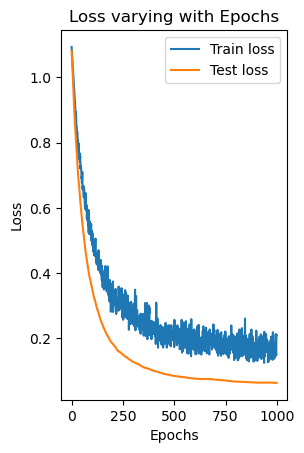

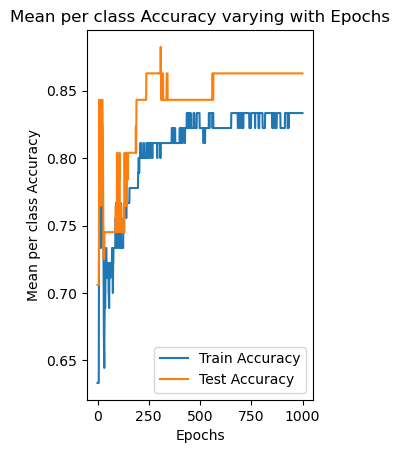

In [46]:
#Loads the training and test data
trainX, trainY = load_data("/Users/wdaugherty/Cornell_Tech_DL/CS-5787/HW2/data/iris-train.txt")
testX, testY = load_data("/Users/wdaugherty/Cornell_Tech_DL/CS-5787/HW2/data/iris-test.txt")

#Normalizes the data
trainX = normalize_data(trainX)
testX = normalize_data(testX)

#Defines the hyperparameters
epochs = 1000
learning_rate = 0.01
batch_size = 8
alpha = 0.001
momentum = 0.1

#Creates the Softmax classifier
sm = Softmax(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size,
            alpha=alpha, momentum=momentum)

#Trains the model
trainLosses, testLosses, trainAccurcy, testAccurcy = sm.train(trainX, trainY, testX, testY)

#Creates the figures
create_figure(trainLosses, testLosses, trainAccurcy, testAccurcy)

### Part 2: Displaying Decision Boundaries 
Plot the decision boundaries learned by softmax classifier on the Iris dataset, just like we
saw in class. On top of the decision boundaries, generate a scatter plot of the training
data. Make sure to label the categories.

In [47]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from cycler import cycler


def display_Dec_Boundary(x: np.ndarray, y: np.ndarray) -> None:
    """
    Displays the decision boundary of the input dataset using a Softmax Classifier.

    Args:
        x (ndarray): A 2D array of shape (n_samples, n_features) containing the input data.
        y (ndarray): A 2D array of shape (n_samples, 1) containing the class labels of the input data.
    
    Returns:
        None
    """
    # Compute the ranges of the x and y axes for plotting the decision boundary
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    # Create a meshgrid of points to evaluate the decision boundary at
    x_ax, y_ax = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

    # Flatten the meshgrid into a 2D array and compute the scores for each point
    arr = np.array([x_ax.ravel(), y_ax.ravel()])
    scores = np.dot(arr.T, sm.weight)

    # Compute the class probabilities for each point using the Softmax function
    prob = sm.compute_softmax_prob(scores)

    # Determine the class with the highest probability for each point
    Z = np.argmax(prob, axis=1) + 1
    Z = Z.reshape(x_ax.shape)

    # Set up markers and colors for plotting the data points
    markers = ('o', 'o', 'o')
    colors = ['#2a9d8f', '#f4a261', '#e76f51']
    edgecolors = ['black', 'black', 'black']
    colorMap = ListedColormap(colors)

    # Set up a color cycle for the plot
    plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

    # Plot the decision boundary as a filled contour plot
    plt.contourf(x_ax, y_ax, Z, alpha=0.3, cmap=colorMap)

    # Plot the data points for each class with a circular marker and black edge
    for idx, cl in enumerate(np.unique(y)):
        xBasedOnLabel = x[np.where(y[:,0] == cl)]
        plt.scatter(x=xBasedOnLabel[:, 0], y=xBasedOnLabel[:, 1],
                    marker=markers[idx], edgecolors=edgecolors[idx], linewidths=1.5,
                    facecolors=colors[idx], label=cl)

    # Set the labels and title for the plot
    plt.ylabel("Sepal Width (cm)")
    plt.xlabel("Speal Length (cm))")
    plt.title("Decision Boundary of Input Dataset with Softmax Classifier")

    # Add a colorblind-friendly legend
    leg = plt.legend(title='Class', loc='upper right')
    for lh in leg.legendHandles:
        lh.set_alpha(1)

    # Add a grid and axis labels
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show the plot
    plt.show()

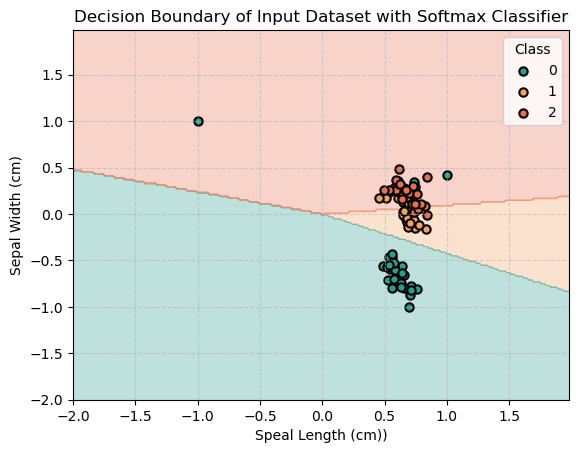

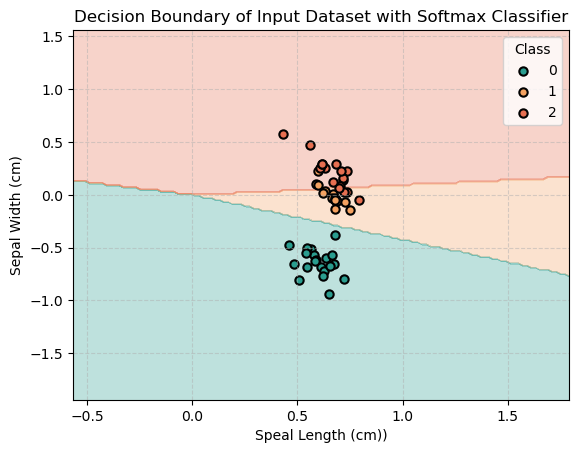

In [48]:
#Calls the function to display the decision boundary of the training data
display_Dec_Boundary(trainX, trainY)

#Calls the function to display the decision boundary of the test data
display_Dec_Boundary(testX, testY)

## Problem 7: Classifying Images
Recall the CIFAR-10 dataset from Homework 0. Using the softmax classifier you imple-
mented, train the model on CIFAR-10’s training partitions. To do this, you will need
to treat each image as a vector. You will need to tweak the hyperparmaters you used
earlier.<br>
<br>Plot the training loss as a function of training epochs. Try to minimize the error as much
as possible. What were the best hyperparmeters? Output the final test accuracy and a
normalized 10 ×10 confusion matrix computed on the test partition. Make sure to label
the columns and rows of the confusion matrix.<br>

In [49]:
def load_CIFAR_Data(listOfTrainFilePath: List[str], testFilePath: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Loads data from train and test files.

    Args:
        listOfTrainFilePath (List[str]): List of file paths containing training data.
        testFilePath (str): File path containing test data.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: A tuple containing xTrain, yTrain, xTest and yTest data.
    """
    # Loads the data from the train files
    xTrain = []
    yTrain = []

    # Iterates through the list of train file paths
    for i in range(len(listOfTrainFilePath)):

        # Loads the data and labels from the current file
        data, labels = loadBatch(listOfTrainFilePath[i])

        # Concatenates the data and labels to the existing data and labels
        xTrain = data if i == 0 else np.concatenate([xTrain, data], axis=0)
        yTrain = labels if i == 0 else np.concatenate([yTrain, labels], axis=0)

    # Loads the data from the test file
    xTest, yTest = loadBatch(testFilePath)
    yTest = np.array(yTest)
    yTrain = np.array(yTrain)

    # Normalizes the data
    return xTrain, yTrain, xTest, yTest

def loadBatch(filePath: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Loads data and labels from a file.

    Args:
        filePath (str): File path to be loaded.

    Returns:
        Tuple[np.ndarray, np.ndarray]: A tuple containing data and labels.
    """
    #   Loads the data from the file
    dataDict = unpickle(filePath)

    #   Returns the data and labels
    return dataDict[b'data'], dataDict[b'labels']

def unpickle(file: str) -> dict:
    """
    Unpickles a file and returns its contents.

    Args:
        file (str): File path to be unpickled.

    Returns:
        dict: The unpickled contents of the file.
    """

    #   Opens the file and unpickles it
    with open(file, 'rb') as fo:

        #   Returns the unpickled contents
        dict = pickle.load(fo, encoding='bytes')

    #   Returns the unpickled contents
    return dict

def normalize_CIFAR_data(x_train: np.ndarray, x_test: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Normalizes the input data by subtracting the mean image and dividing by 255.

    Args:
    x_train (np.ndarray): Array of training data.
    x_test (np.ndarray): Array of test data.

    Returns:
    Tuple[np.ndarray, np.ndarray]: Tuple containing normalized x_train and x_test arrays.
    """

    #   Subtracts the mean image and divides by 255
    mean_image = np.mean(x_train, axis=0)

    #   Normalizes the data
    x_train_d = x_train - mean_image

    #   Normalizes the data
    x_test_d = x_test - mean_image

    #   Divides by 255
    x_train_d = np.divide(x_train_d, 255.)
    x_test_d = np.divide(x_test_d, 255.)

    #   Returns the normalized data
    return x_train_d, x_test_d


def get_confusion_matrix(actual_label: np.ndarray, predicted_label: np.ndarray, num_of_class: int) -> np.ndarray:
    """
    Returns the confusion matrix for actual and predicted labels.

    Args:
    actual_label (np.ndarray): Array of actual labels.
    predicted_label (np.ndarray): Array of predicted labels.
    num_of_class (int): Number of classes.

    Returns:
    np.ndarray: Confusion matrix.
    """
    #   Creates a confusion matrix
    conf_matrix = np.zeros((num_of_class, num_of_class), dtype=int)

    #   Iterates through the actual labels
    for sample_num in range(actual_label.shape[0]):
        
        #   Increments the count of the actual and predicted labels
        conf_matrix[int(actual_label[sample_num])][int(predicted_label[sample_num])] += 1

    #   Returns the confusion matrix
    return conf_matrix

In [50]:
import itertools
from typing import List, Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(model, x_test: np.ndarray, actual_labels: np.ndarray, classes: List[str], 
                          normalize: Optional[bool] = False, title: Optional[str] = 'Confusion matrix',
                          cmap: Optional = plt.cm.Greens) -> None:
    """
    Plots the confusion matrix for a given model.

    Args:
        model: A trained model that has a predict method.
        x_test: The input data for testing the model.
        actual_labels: The actual labels of the data.
        classes: The names of the classes in the dataset.
        normalize: Whether to normalize the confusion matrix. Default is False.
        title: The title of the plot. Default is 'Confusion matrix'.
        cmap: The color map to use for the plot. Default is plt.cm.Reds.

    Returns:
        None.
    """
    # Predict labels using the model
    predicted_labels = model.predict(x_test)
    predicted_labels = predicted_labels.reshape((-1, 1))

    # Calculate the confusion matrix
    confusion_matrix = get_confusion_matrix(actual_labels, predicted_labels, 10)

    if normalize:
        # Normalize the confusion matrix
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(confusion_matrix)

    # Plot the confusion matrix
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=60)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def create_fig_loss(train_losses: List[float], test_losses: List[float]) -> None:
    """
    Creates a figure showing the training and test losses.

    Args:
        train_losses: The training losses.
        test_losses: The test losses.

    Returns:
        None.
    """
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train loss")
    plt.plot(test_losses, label="Test loss")
    plt.legend(loc='best')
    plt.title("Loss varying with Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()


def create_fig_acc(train_acc: List[float], test_acc: List[float]) -> None:
    """
    Creates a figure showing the mean per class accuracy for training and test sets.

    Args:
        train_acc: The mean per class accuracy for the training set.
        test_acc: The mean per class accuracy for the test set.

    Returns:
        None.
    """
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(test_acc, label="Test Accuracy")
    plt.legend(loc='best')
    plt.title("Mean per class Accuracy varying with Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Mean per class Accuracy")
    plt.show()


In [51]:
def run_softmax_training(train_filenames, test_filename: str,  
                         epochs: int = 100, learning_rate: float = 0.001, batch_size: int = 200, 
                         reg_strength: float = 0.001, momentum: float = 0.005) -> Tuple[List[float], List[float], 
                         List[float], List[float]]:
    """
    Perform softmax regression training on the given training data using the specified parameters.
    
    Args:
        train_filenames: List of strings containing the file paths for training data
        test_filename: String containing the file path for testing data
        meta_filename: String containing the file path for meta data
        epochs: Integer representing the number of iterations for training (default=100)
        learning_rate: Float representing the learning rate for the model (default=0.001)
        batch_size: Integer representing the batch size for training (default=200)
        reg_strength: Float representing the regularization strength for the model (default=0.001)
        momentum: Float representing the momentum for optimization algorithm (default=0.005)
    
    Returns:
       The results of the fitting the model to the training data. The results also include losses per epoh, 
       accuracy per epoch and a confusion matrix.
    """
    # Load and preprocess the data from the training and testing files
    xTrain, yTrain, xTest, yTest = load_CIFAR_Data(train_filenames, test_filename)
    xTrain, xTest = normalize_CIFAR_data(xTrain, xTest)
    yTrain = yTrain.reshape((-1, 1))
    yTest = yTest.reshape((-1, 1))
    
    # Perform softmax regression training
    sftmx = Softmax(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, alpha=reg_strength, momentum=momentum)
    train_losses, test_losses, train_acc, test_acc = sftmx.train(xTrain, yTrain, xTest, yTest)
    
    # Print the parameters used for training
    print(f"Epochs: {epochs} | Learning Rate: {learning_rate} | Batch Size: {batch_size} | Regularization Strength: {reg_strength} | Momentum: {momentum} |")
    
    # Creates a figure of the training and testing losses and displays it
    create_fig_loss(train_losses, test_losses)

    # Creates a figure of the training and testing accuracy and displays it
    create_fig_acc(train_acc, test_acc)

    # Plots the confusion matrix for the softmax model using the testing data and displays it
    # The labels for the classes are "0123456789", and the matrix is normalized
    # The title of the plot is 'Normalized confusion matrix'
    plot_confusion_matrix(sftmx, xTest, yTest, ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], normalize=True, title='Normalized confusion matrix')

    # Displays all figures
    plt.show()

0	->	TrainL : 1.5333042	|	TestL : 0.8711835	|	TrainAcc : 0.2705000	|	TestAcc: 0.2779000
1	->	TrainL : 0.9415442	|	TestL : 0.6807617	|	TrainAcc : 0.2919400	|	TestAcc: 0.2968000
2	->	TrainL : 0.8019055	|	TestL : 0.5688009	|	TrainAcc : 0.3045200	|	TestAcc: 0.3103000
3	->	TrainL : 0.6897922	|	TestL : 0.4709089	|	TrainAcc : 0.3169800	|	TestAcc: 0.3182000
4	->	TrainL : 0.6353432	|	TestL : 0.4066527	|	TrainAcc : 0.3250800	|	TestAcc: 0.3248000
5	->	TrainL : 0.5917143	|	TestL : 0.3591708	|	TrainAcc : 0.3315200	|	TestAcc: 0.3329000
6	->	TrainL : 0.5531983	|	TestL : 0.3286639	|	TrainAcc : 0.3377800	|	TestAcc: 0.3388000
7	->	TrainL : 0.5210563	|	TestL : 0.3103017	|	TrainAcc : 0.3434600	|	TestAcc: 0.3432000
8	->	TrainL : 0.5021776	|	TestL : 0.2930860	|	TrainAcc : 0.3481000	|	TestAcc: 0.3486000
9	->	TrainL : 0.4864277	|	TestL : 0.2721310	|	TrainAcc : 0.3509200	|	TestAcc: 0.3518000
10	->	TrainL : 0.4721200	|	TestL : 0.2680306	|	TrainAcc : 0.3548000	|	TestAcc: 0.3539000
11	->	TrainL : 0.4587920	|	Test

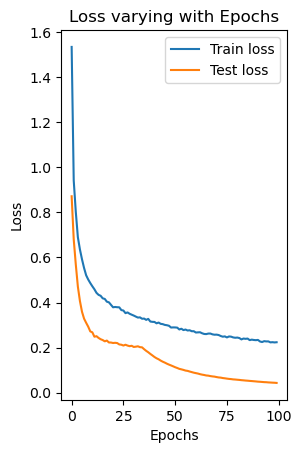

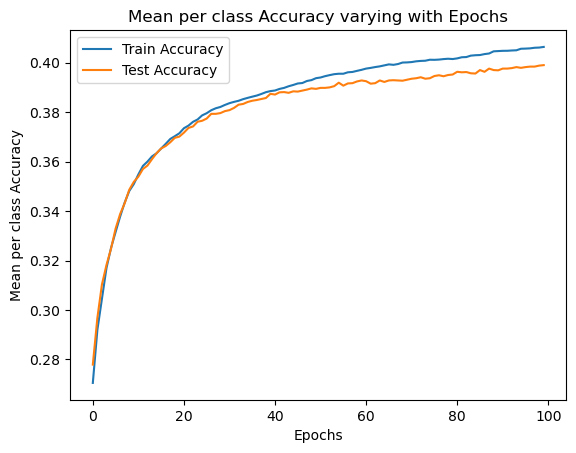

Normalized confusion matrix
[[0.482 0.055 0.034 0.019 0.013 0.023 0.027 0.042 0.221 0.084]
 [0.059 0.483 0.017 0.034 0.016 0.041 0.054 0.036 0.095 0.165]
 [0.114 0.057 0.21  0.069 0.112 0.091 0.186 0.064 0.072 0.025]
 [0.05  0.075 0.077 0.226 0.046 0.187 0.157 0.053 0.055 0.074]
 [0.067 0.041 0.115 0.041 0.279 0.08  0.211 0.102 0.036 0.028]
 [0.044 0.048 0.09  0.138 0.06  0.334 0.118 0.069 0.073 0.026]
 [0.021 0.058 0.056 0.081 0.074 0.075 0.539 0.027 0.024 0.045]
 [0.056 0.054 0.059 0.042 0.096 0.075 0.072 0.395 0.055 0.096]
 [0.149 0.073 0.008 0.021 0.008 0.05  0.012 0.015 0.545 0.119]
 [0.07  0.168 0.013 0.026 0.012 0.016 0.045 0.041 0.112 0.497]]


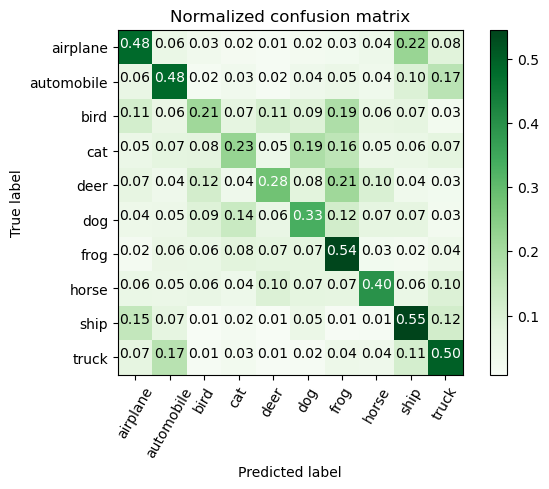

In [ ]:
train_filenames =["/Users/wdaugherty/Cornell_Tech_DL/CS-5787/HW2/data/data_batch_" + str(i) for i in range(1, 6)]#Defines the path for the training data files
test_filename = "/Users/wdaugherty/Cornell_Tech_DL/CS-5787/HW2/data/test_batch" #Defines the path for the testing data file

#Calls the function to run the softmax training
run_softmax_training(train_filenames, test_filename, epochs=100, learning_rate=0.001, batch_size=200, reg_strength=0.001, momentum=0.005)


<b> NOTE: Since this is only for auditing the following report is neither complete nor accurate. It should also be noted that I consulted many students in making this rpeort including: Marcelo Feuntes, Michelle Wang, Renata Anastasia, Curtis Chen, Jan Carbonell, Naman Makkar, Fabio Deo, Federico Tiberga, and Nick Pacia. <br>

It should also be noted that I used generative AI such as ChatGPT,  github copilot and CodeT5 for optimization and writing a portion of the code within the report. <br>

Some other resources used were: the course textbook, https://www.sharpsightlabs.com/blog/numpy-softmax/ , Volodymyr Kuleshov's github code for plotting decision boundaries, https://www.w3schools.com/python/python_ml_confusion_matrix.asp, and https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/, https://github.com/fanghao6666/neural-networks-and-deep-learning/blob/master/py/Python%20Basics%20With%20Numpy%20v3.py, https://gist.github.com/wyattowalsh/6a95b1c9ad6118b196336cffd5de4f72, https://gist.github.com/wyattowalsh/ea40197ce51b41503bfa188b4ffcecb6<br>

There are other resources consulted on github and stack overflow however I have lost track of them.